#**Combined Data Cleaning, Feature Selection, Modeling and Interpretability report**

##**Abstract**

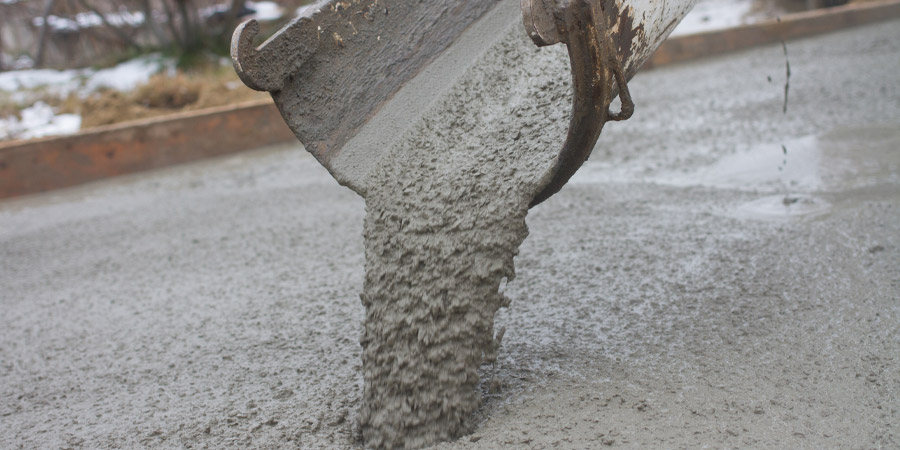

This dataset represents the concrete strength based on different quantities of cement, slag, flyash, aggregates, etc. So, I'm going to perform some data clearning and feature selection on this dataset which helps in better prediction of the concrete strength. Below are the Inependent(Predictor )and Dependent(target) Variables.

*Attributes Information:*

Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable

Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable

Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable

Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable

Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable

Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable

Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable

Age -- quantitative -- Day (1~365) -- Input Variable

Concrete compressive strength -- quantitative -- MPa -- Output Variable

##**The Question!? & The Approach**

***What is the question? What did you do?***

The question is to build an efficient model to predict the concrete strength from the given dataset.

Below are the steps/approach we have taken to work on the above question.

- Understanding Data
- Checking Data Quality
- Data Preprocessing Steps
- Modeling : Linear Regression, Random Forest, AutoML using H2O
- Regularization: Ridge & Lasso
- Feature Importance
- Reports and Visualization
- SHAP Analysis

##**Importing Libraries**

Importing the required libraries

In [ ]:
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import preprocessing
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.inspection import permutation_importance
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import xgboost
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

##**Loading Data**


Reading data from my github repository

In [ ]:
df = pd.read_csv('https://media.githubusercontent.com/media/sowmyachinimilli/DS_Assignments/main/Concrete_Data_Yeh.csv')

In [ ]:
#Displays the top rows of the dataset
df.head()

cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0   540.0    0.0     0.0  162.0               2.5           1040.0   
1   540.0    0.0     0.0  162.0               2.5           1055.0   
2   332.5  142.5     0.0  228.0               0.0            932.0   
3   332.5  142.5     0.0  228.0               0.0            932.0   
4   198.6  132.4     0.0  192.0               0.0            978.4   

   fineaggregate  age  csMPa  
0          676.0   28  79.99  
1          676.0   28  61.89  
2          594.0  270  40.27  
3          594.0  365  41.05  
4          825.5  360  44.30

##**Data Cleaning and Preprocessing**

***What are the data types? (Only numeric and categorical)***


There are two types in data: Numerical and Categorical data. Numerical data contains both discrete and continuous values and Categorical data contains data with labels or categories.

As seen below, the datatypes of the variables in the given dataset are either int or float, which are discrete or continuous values. There are no other dataypes whose values are categorized or have labels. We can infer that the input variables or features of this dataset have only numerical data and no categorical data.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


***Do the ranges of the predictor variables make sense?***

The ranges of the predictor variables do make sense as the variables have significant mean values and also, minimum and maximum values. I didn't find any abnormalities in the data of these variables.

In [ ]:
df.describe()

cement         slag       flyash        water  superplasticizer  \
count  1030.000000  1030.000000  1030.000000  1030.000000       1030.000000   
mean    281.167864    73.895825    54.188350   181.567282          6.204660   
std     104.506364    86.279342    63.997004    21.354219          5.973841   
min     102.000000     0.000000     0.000000   121.800000          0.000000   
25%     192.375000     0.000000     0.000000   164.900000          0.000000   
50%     272.900000    22.000000     0.000000   185.000000          6.400000   
75%     350.000000   142.950000   118.300000   192.000000         10.200000   
max     540.000000   359.400000   200.100000   247.000000         32.200000   

       coarseaggregate  fineaggregate          age        csMPa  
count      1030.000000    1030.000000  1030.000000  1030.000000  
mean        972.918932     773.580485    45.662136    35.817961  
std          77.753954      80.175980    63.169912    16.705742  
min         801.000000     594.000000     1.000000     2.330000  
25%         932.000000     730.950000     7.000000    23.710000  
50%         968.000000     779.500000    28.000000    34.445000  
75%        1029.400000     824.000000    56.000000    46.135000  
max        1145.000000     992.600000   365.000000    82.600000

###**Checking Missing Values and Duplicates**

***Are there missing values? Which independent variables have missing data? How much?*** 

As per the below observation, there are no missing values in any of the variables in the given dataset.

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64


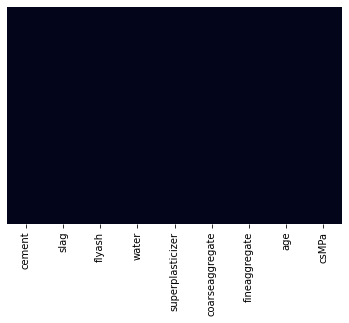

In [ ]:
print(df.isnull().sum())
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

###**Distribution of numerical values**


***What are the likely distributions of the numeric variables? What are the distributions of the predictor variables?***

Below are the plots of distribution curves of the numeric variables. As per the observations most of the features are normally distributed.

The distributions of these numeric variables are as follows:

Water, Coarseaggregate, fine aggregate and csMPa are normally distributed.

Cement, Flyash, Superplasticizer, Age, Slag, Water, fineaggregate are left skewed.

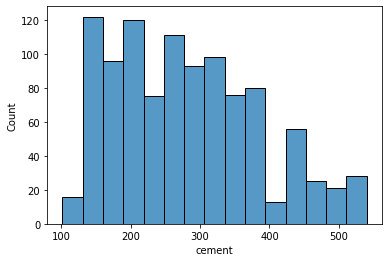

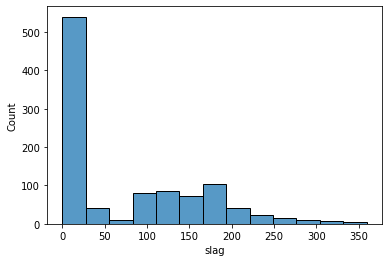

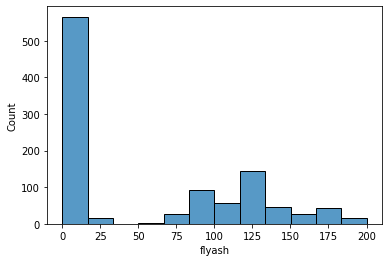

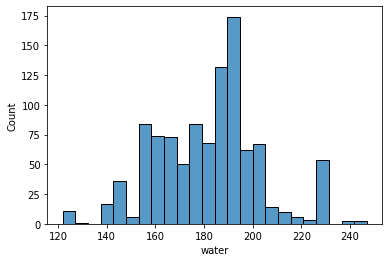

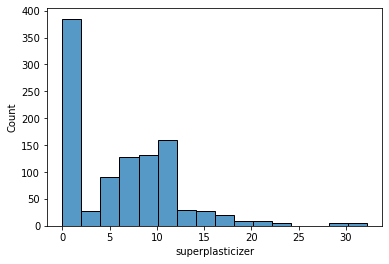

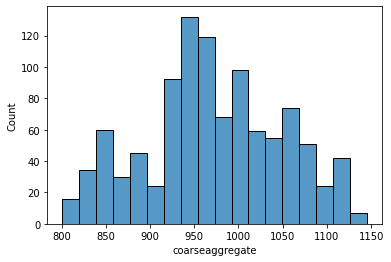

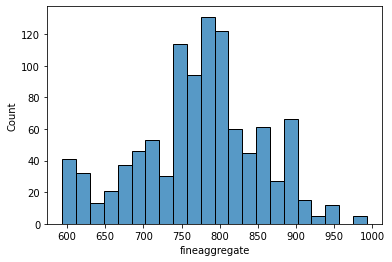

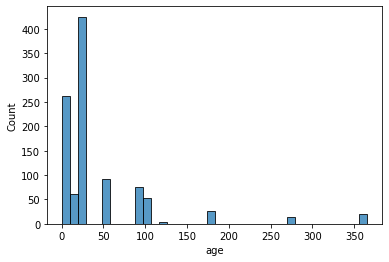

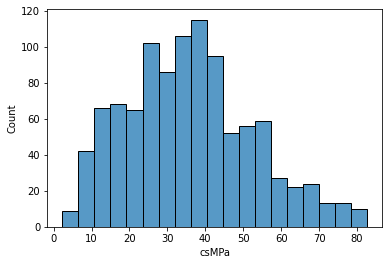

In [ ]:
#histograms for all the features to observe the distribution
for x in df.columns:
  plt.figure() 
  sns.histplot(df[x])

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Ple

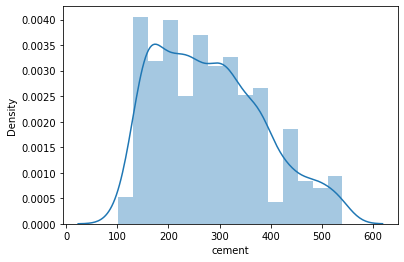

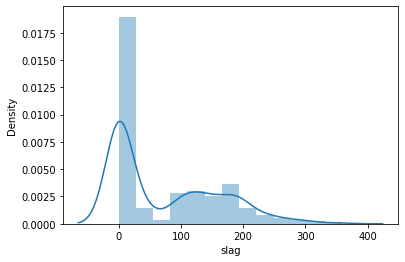

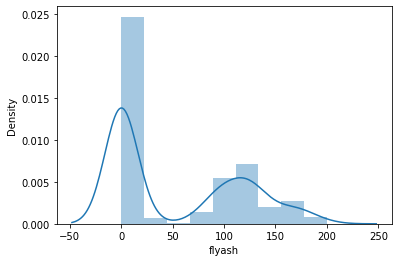

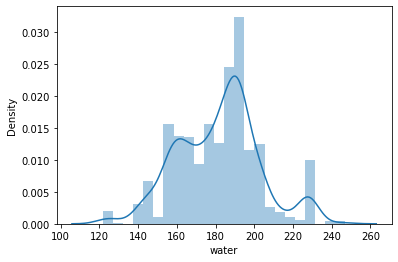

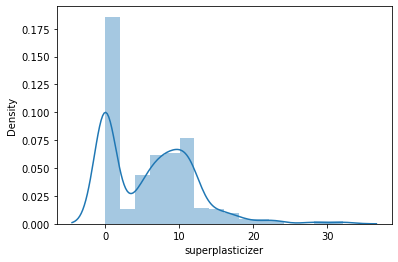

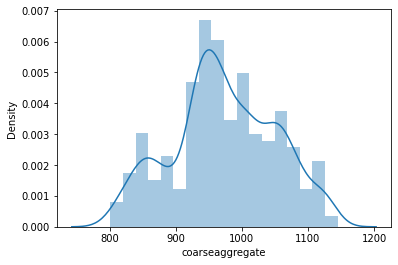

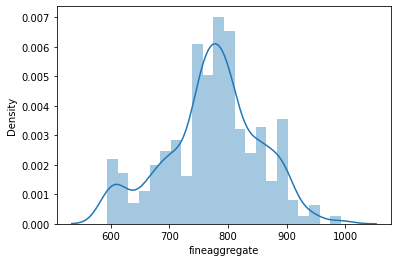

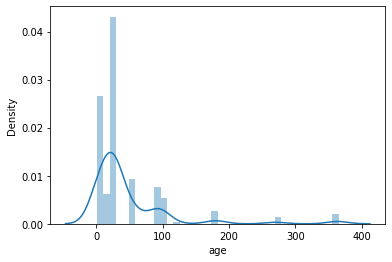

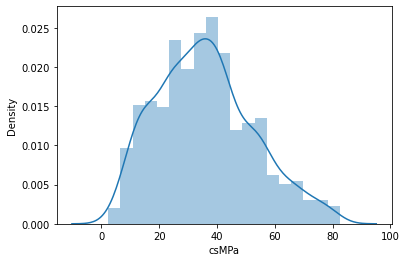

In [ ]:
#densityplots for all the features to observe the distribution
for x in df.columns:
  plt.figure() 
  sns.distplot(df[x])

###**Finding Outliers**

We are using box plots, scatter plots and IQR methods to find the outliers in the data. 

From the below boxplots, looks like the age, fine aggregate have significant outliers. Slag, Water, Superplasticizer and csMPa also have few outliers but there are close to the ranges, so we can neglect them.

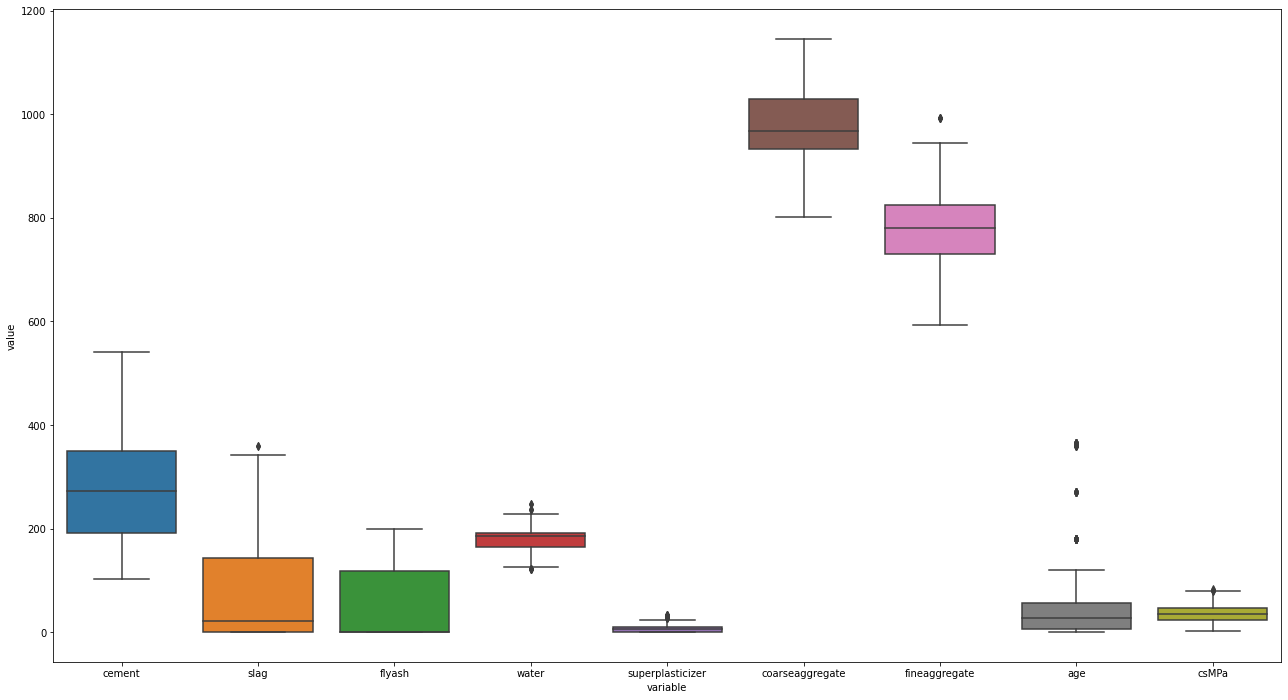

In [ ]:
plt.figure(figsize=(22,12))
sns.boxplot(x="variable", y="value", data=pd.melt(df))

Now, let's also check the scatter plots for these variables to identify if there are any significant outliers.
Examining the below scatter plots we can notice that there are only few outliers for fine aggregate, so we can keep them.

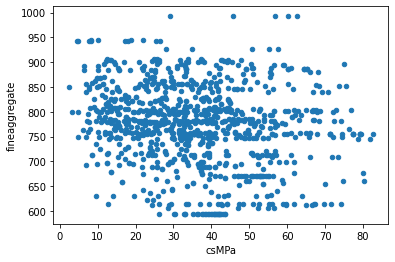

In [ ]:
df.plot(kind='scatter',x='csMPa',y='fineaggregate')

The feature 'age' do have a significant outliers. Let's calculate the ranges to detect these outliers using IQR technique.

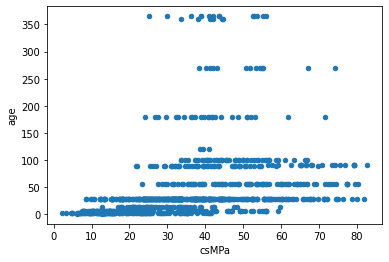

In [ ]:
df.plot(kind='scatter',x='csMPa',y='age')

####***Remove outliers and keep outliers (does it have an effect of the final predictive model)?***

Considering the variable 'age', we are now performing the IQR technique to calculate the ranges to detect outliers. 

As per the below results there are around 59 values of 'age' that are found to be outliers. Based on the feature importance that we calculated in the below steps, it is seen that age is also one of the significant features. So we can keep these values.

In [ ]:
Q1_age=df['age'].quantile(0.25)
Q3_age=df['age'].quantile(0.75)
IQR_age=Q3_age-Q1_age
print(Q1_age)
print(Q3_age)
print(IQR_age)

7.0
56.0
49.0


In [ ]:
len(df[np.logical_or(df['age']<(Q1_age-1.5*IQR_age),df['age']>(Q3_age+1.5*IQR_age))])

59

###**Normalizing the data**

Since the predictor variables are in different units and scales, we are using the MinMaxScaler to rescales every feature to (0,1) interval.

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df)

#applying normalization to our data
df[['csMPa','cement','slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate','age']] = pd.DataFrame(x_scaled)
df_new = pd.DataFrame(df, columns = ['cement','slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate','age','csMPa'])
df_new.head(10)

cement  slag    flyash    water  superplasticizer  coarseaggregate  \
0  0.000000   0.0  0.321086  0.07764          0.694767         0.205720   
1  0.000000   0.0  0.321086  0.07764          0.738372         0.205720   
2  0.396494   0.0  0.848243  0.00000          0.380814         0.000000   
3  0.396494   0.0  0.848243  0.00000          0.380814         0.000000   
4  0.368392   0.0  0.560703  0.00000          0.515698         0.580783   
5  0.317195   0.0  0.848243  0.00000          0.380814         0.190667   
6  0.264329   0.0  0.848243  0.00000          0.380814         0.000000   
7  0.264329   0.0  0.848243  0.00000          0.380814         0.000000   
8  0.317195   0.0  0.848243  0.00000          0.380814         0.190667   
9  0.000000   0.0  0.848243  0.00000          0.380814         0.000000   

   fineaggregate       age     csMPa  
0       0.074176  0.967485  1.000000  
1       0.074176  0.741996  1.000000  
2       0.739011  0.472655  0.526256  
3       1.000000  0.482372  0.526256  
4       0.986264  0.522860  0.220548  
5       0.244505  0.556871  0.374429  
6       1.000000  0.515386  0.634703  
7       0.074176  0.425065  0.634703  
8       0.074176  0.542170  0.374429  
9       0.074176  0.460446  0.851598

###**Detecting Multicollinearity**


Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.
We are now checking the correlation bewteen predictor variables using heatmap.

***Are the predictor variables independent of all the other predictor variables?***

Based on the observations from heatmap, we can notice that the variables 

- flyash and water have high correlation in the given variables.
- flyash and coarseaggregate are moderately correlated.

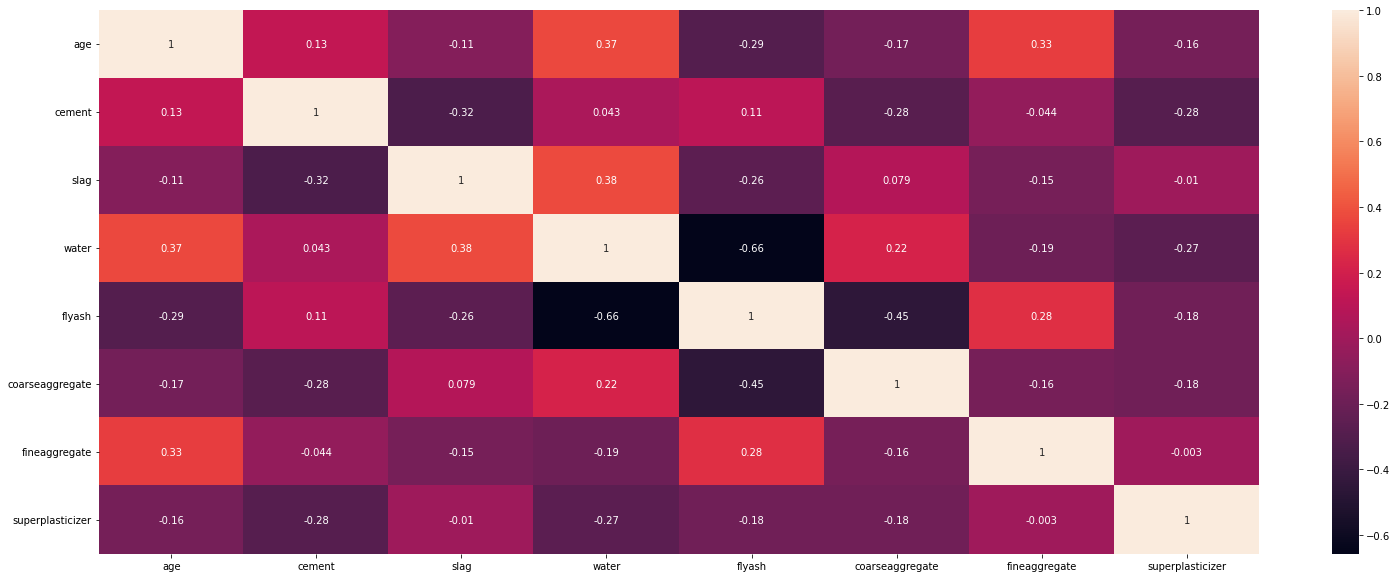

In [ ]:
#generating heatmap
corr=df_new[['age','cement','slag','water','flyash','coarseaggregate','fineaggregate','superplasticizer']].corr()
plt.figure(figsize=(26,10))
sns.heatmap(corr, annot=True)

Below are some of the observations using pairplot. Some variables have positive linear relationships with respect to other variables i.e, if one variable increase , the other also increases. Whereas, some variables have negative linear relationships i.e, if one variable increase, the other decrease.
- Cement has positive linear relationship with flyash, water, age and negative linear relationship with others.
- Slag has negative linear relationship with cement, flyash, superplasticizer, fineaggregate, age and positive linear relationship with others.
- Flyash has positive linear relationship with cement, fineaggregate and negative linear relationship with others.
- Water has positive linear relationship with cement, slag, coarseaggregate, age and negative linear relationship with others.
- Superplasticizer has negative linear relationship with all the other predictor variables.
- Coarseaggregate has positive linear relationship with slag, water and negative linear relationship with others.
- Fineaggregate has positive relationship with flyash, age and negative linear relationship with others.
- Age has positive linear relationship with cement, water, fineaggregate and negative lieanr relationship with others.

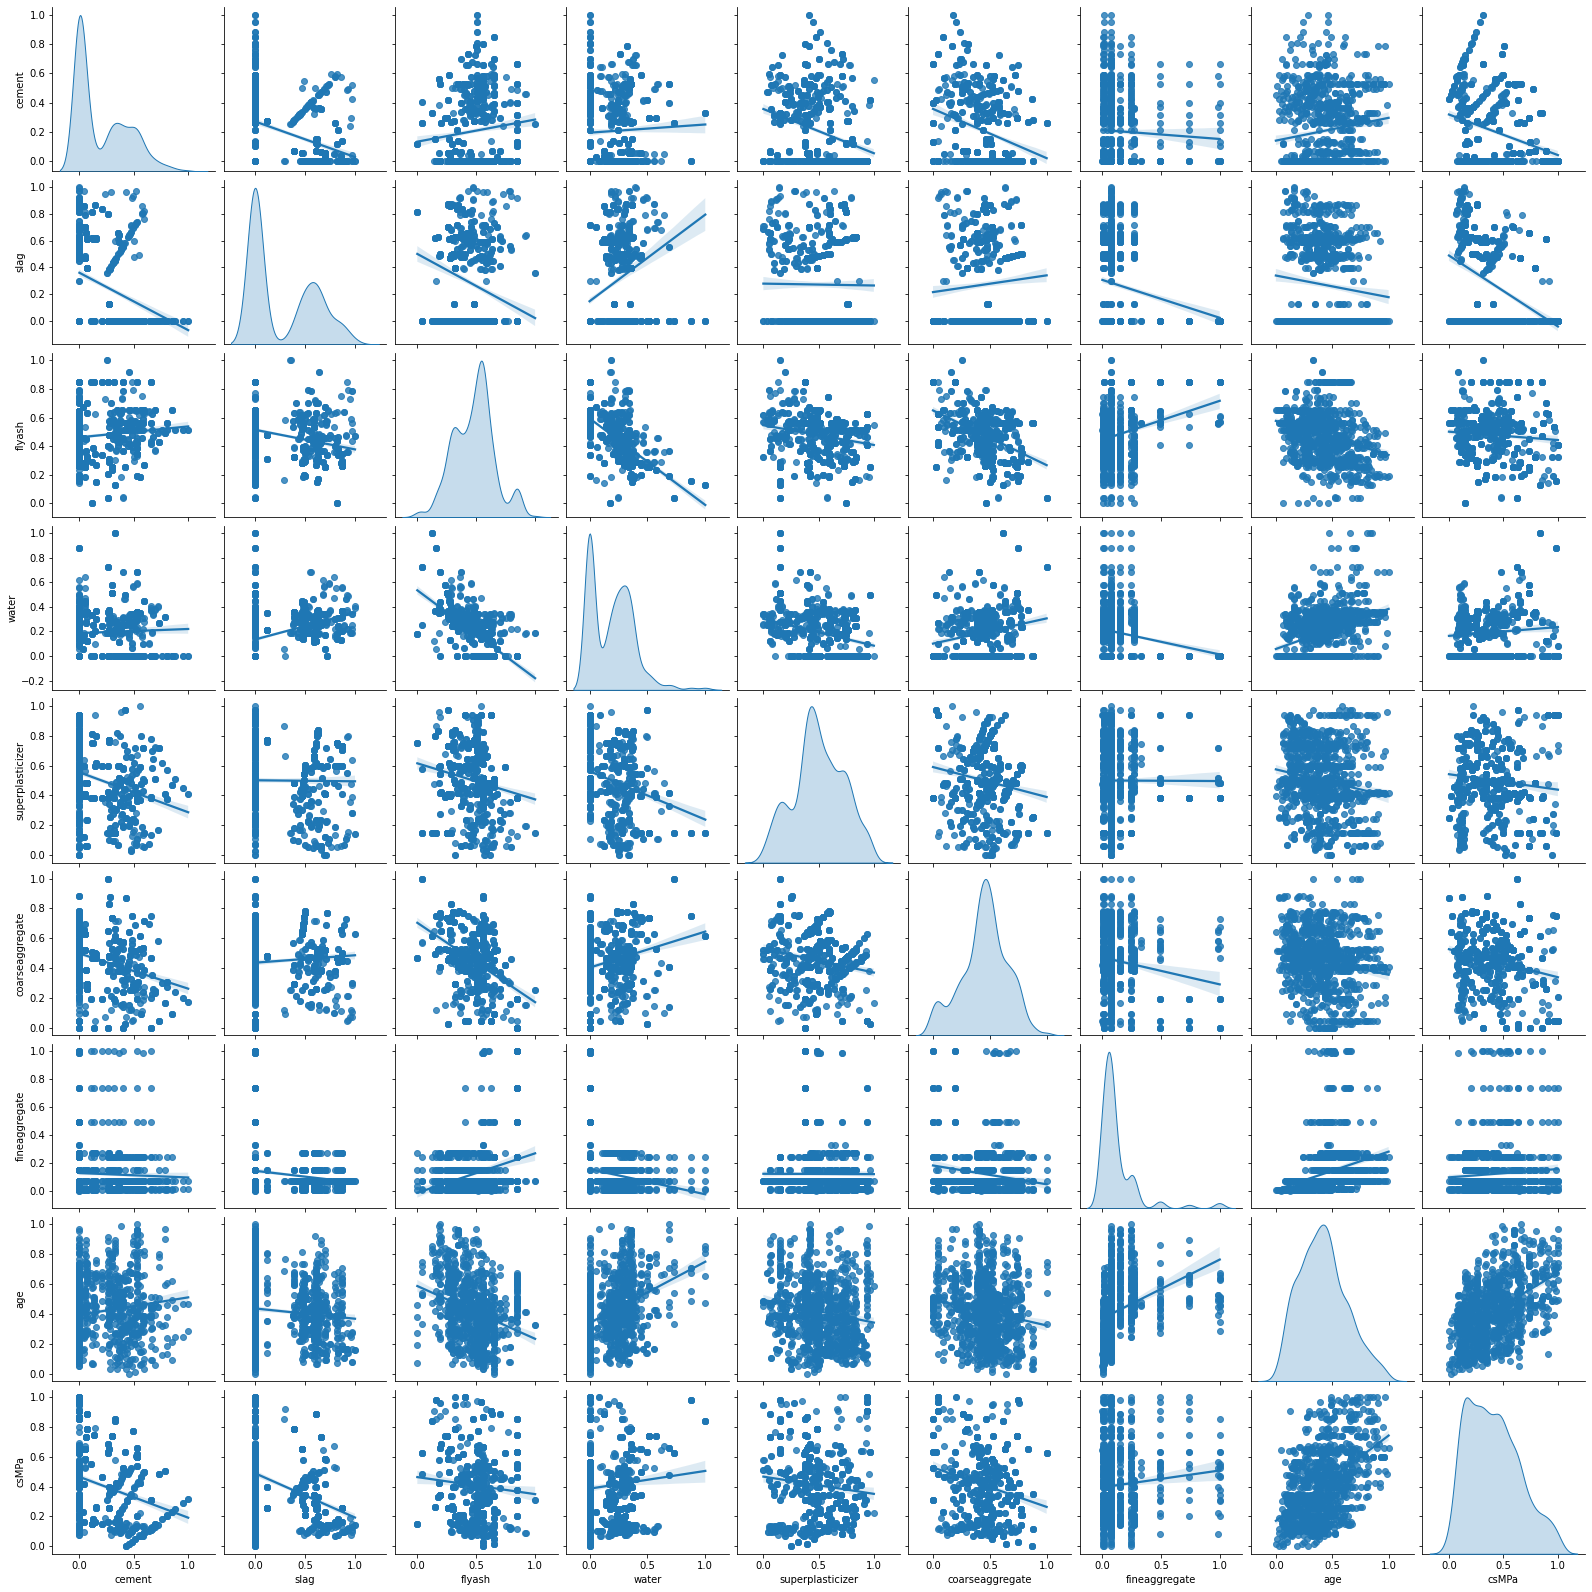

In [ ]:
sns.pairplot(df_new,kind='reg', diag_kind='kde')

##**Training and Test Sets Split**

***Do the training and test sets have the same data?***

The data split is as follows:

Taining data - 80%

Test data - 20%


The below graphs depict the distributions of training and test datasets, from which we can infer the distribution of data in these sets is almost similar.

In [ ]:
x = df_new[['age','cement','slag','water','flyash','coarseaggregate','fineaggregate','superplasticizer']]
y = df_new['csMPa']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

To output multiple subplots, the figure containing the passed axes is being cleared


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74a2bf2090>,
      dtype=object)

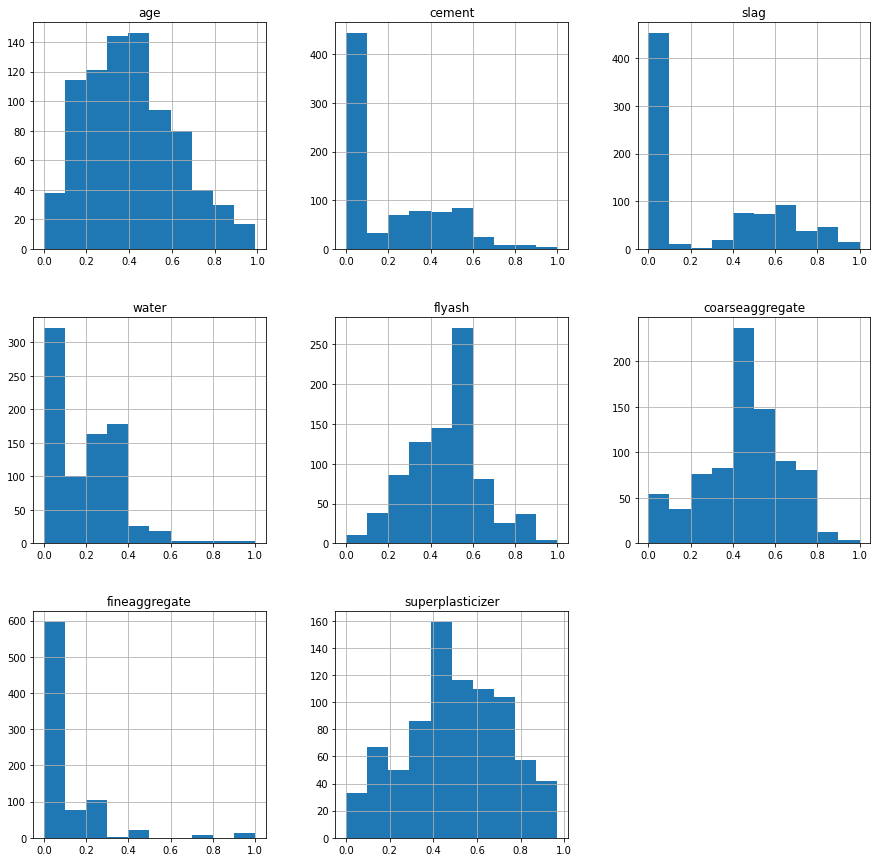

In [ ]:
#distributionn of data from training set
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
x_train.hist(ax = ax)

To output multiple subplots, the figure containing the passed axes is being cleared


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f749ff53310>,
      dtype=object)

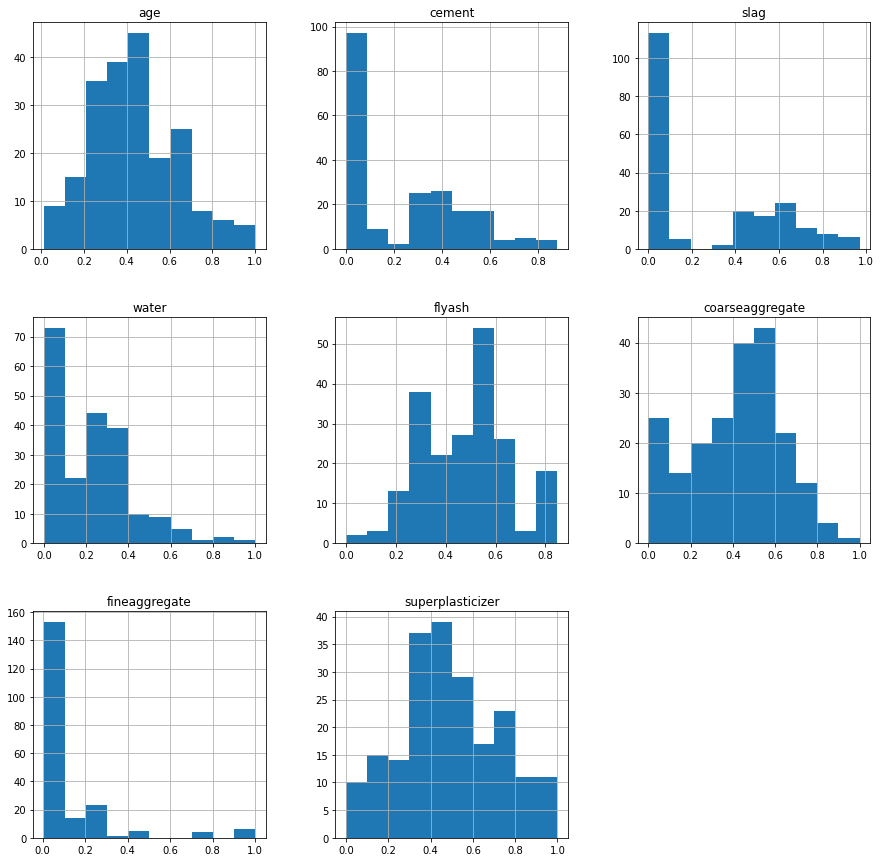

In [ ]:
#distributions of data from the test set
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
x_test.hist(ax = ax)

##**Modeling**

###**Fitting a linear model and interpreting the regression coefficients**

####**Using Linear Regression**

Here, we are creating a model and using it for best fit line, i.e the linear regression. The model is trained on the training data which is 80% split of the original dataset. 

We are interpreting the regression coefficents as seen below which are the coefficients of the independent variables in a linear model.

In [ ]:
mod=LinearRegression()
mod.fit(x_train,y_train)
reg_coeff = pd.DataFrame(data={
    'Attribute': x.columns,
    'Reg_Coeff': mod.coef_
})
for i in range(len(reg_coeff)):
  print(reg_coeff['Attribute'][i],end=": ")
  print(reg_coeff['Reg_Coeff'][i],end="\n")

age: 0.26924835731603597
cement: -0.8364889787519163
slag: -0.5452387814238853
water: -0.028468916005512337
flyash: -0.7024555103193855
coarseaggregate: -0.8338918081731479
fineaggregate: -0.169262805151538
superplasticizer: -0.5642043479498169


Using model coefficients of this linear model, we can get the feature importance of the variables. Below is a plot to understand the feature importance.

Below are the top 5 variables that are useful for the predicting the target variable based on model coefficents.
1. Coarseaggregate
2. Cement
3. Flyash
4. Superplasticizer
5. Slag

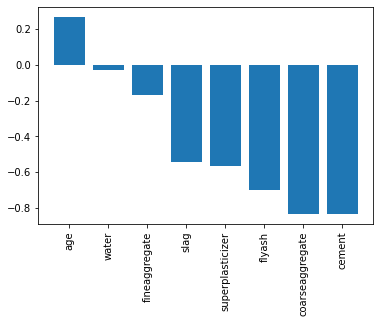

In [ ]:
reg_coeff = reg_coeff.sort_values(by='Reg_Coeff', ascending=False)
plt.bar(x=reg_coeff['Attribute'], height=reg_coeff['Reg_Coeff'])
plt.xticks(rotation='vertical')
plt.show()

We are calculating the mean absolute error on both training and testing data. The error rates rates are very low, which is good sign.

In [ ]:
def cal_mae(x,y):
  y_pred=mod.predict(x)
  return mean_absolute_error(y,y_pred)

In [ ]:
trainerror_mae=cal_mae(x_train,y_train)
testerror_mae=cal_mae(x_test,y_test)
print(f"train MAE = {round(trainerror_mae, 3)}, test MAE = {round(testerror_mae, 3)} ")

train MAE = 0.06, test MAE = 0.063 


####**Using OLS method:**

We are also using the OLS method, i.e, the least squares method from statmodels to find the best fit line. 

From the below summary we can interpret the reqression coefficients accordingly , which are the coefficients of the independent variables and also observe the p-value to understand the significance of these variables.

As per the p-values calculated for the below predictor variables, there are no variables that have p-value greater than 0.05. Therefore, it is evident that the relationsips between the independent and dependent variables are statistically significant.

In [ ]:
lreg=sm.OLS(y_train,x_train)
lreg=lreg.fit()

In [ ]:
lreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  csMPa   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.911
Method:                 Least Squares   F-statistic:                              1052.
Date:                Fri, 06 May 2022   Prob (F-statistic):                        0.00
Time:                        20:12:19   Log-Likelihood:                          452.03
No. Observations:                 824   AIC:                                     -888.1
Df Residuals:                     816   BIC:                                     -850.3
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                  0.7789      0.027     28.497      0.000       0.725       0.833
cement              -0.5959      0.023    -25.649      0.000      -0.642      -0.550
slag                -0.4210      0.019    -22.612      0.000      -0.458      -0.384
water                0.4615      0.041     11.179      0.000       0.380       0.542
flyash               0.5858      0.025     23.659      0.000       0.537       0.634
coarseaggregate     -0.0936      0.022     -4.286      0.000      -0.136      -0.051
fineaggregate       -0.4307      0.034    -12.710      0.000      -0.497      -0.364
superplasticizer     0.0770      0.019      4.079      0.000       0.040       0.114
==============================================================================
Omnibus:                       48.273   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.431
Skew:                           0.604   Prob(JB):                     9.19e-13
Kurtosis:                       3.391   Cond. No.                         10.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We are calculating the mean absolute error on both training and testing data. The error rates rates are very low, which is good sign.

In [ ]:
def cal_mae_ols(x,y):
  y_ols_pred=lreg.predict(x)
  return mean_absolute_error(y,y_ols_pred)

In [ ]:
trainerror_mae=cal_mae_ols(x_train,y_train)
testerror_mae=cal_mae_ols(x_test,y_test)
print(f"train MAE = {round(trainerror_mae, 3)}, test MAE = {round(testerror_mae, 3)} ")

train MAE = 0.109, test MAE = 0.112 


###**Fitting a tree-based model and interpreting the nodes**

**Using RandomForestRegressor:**

We have taken a randomforest regressor with tree depth as 3. 

In [ ]:
rf_reg=RandomForestRegressor(n_estimators=10,max_depth=3)
pipeline = Pipeline([
    ('rf_reg', rf_reg)
])
p = pipeline.fit(x_train, y_train)

In [ ]:
rf_reg.estimators_[0]

DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=1460649867)

Below is the represenation of the tree with maxiumum depth 3, which shows the corresponding nodes and the values that are calculated using the mse values. These values of the feature are used to make a decision.

[Text(0.5, 0.875, 'cement <= 0.468\nsquared_error = 0.051\nsamples = 515\nvalue = 0.398'),
 Text(0.25, 0.625, 'slag <= 0.095\nsquared_error = 0.035\nsamples = 318\nvalue = 0.32'),
 Text(0.125, 0.375, 'flyash <= 0.47\nsquared_error = 0.032\nsamples = 190\nvalue = 0.386'),
 Text(0.0625, 0.125, 'squared_error = 0.019\nsamples = 90\nvalue = 0.506'),
 Text(0.1875, 0.125, 'squared_error = 0.019\nsamples = 100\nvalue = 0.281'),
 Text(0.375, 0.375, 'coarseaggregate <= 0.047\nsquared_error = 0.02\nsamples = 128\nvalue = 0.206'),
 Text(0.3125, 0.125, 'squared_error = 0.027\nsamples = 6\nvalue = 0.52'),
 Text(0.4375, 0.125, 'squared_error = 0.016\nsamples = 122\nvalue = 0.194'),
 Text(0.75, 0.625, 'flyash <= 0.414\nsquared_error = 0.051\nsamples = 197\nvalue = 0.53'),
 Text(0.625, 0.375, 'slag <= 0.086\nsquared_error = 0.043\nsamples = 124\nvalue = 0.605'),
 Text(0.5625, 0.125, 'squared_error = 0.021\nsamples = 35\nvalue = 0.808'),
 Text(0.6875, 0.125, 'squared_error = 0.029\nsamples = 89\nvalue 

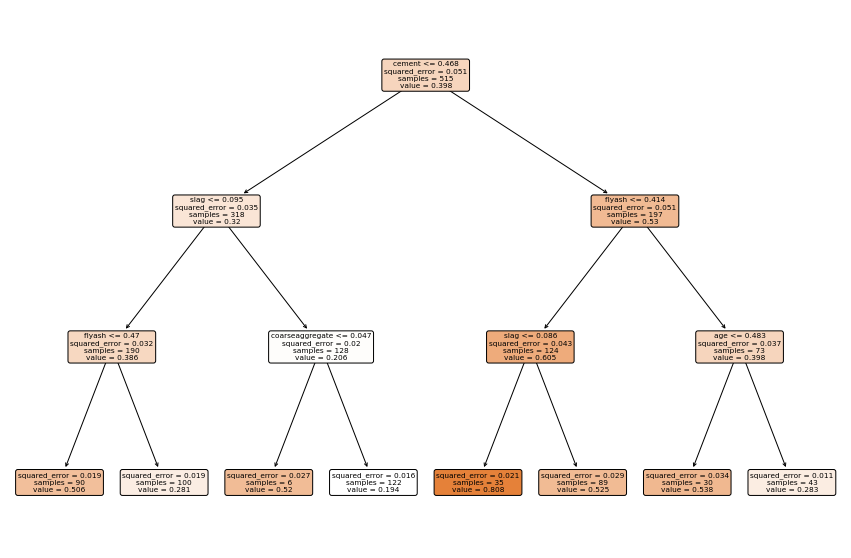

In [ ]:
fig = plt.figure(figsize=(15, 10))
plot_tree(rf_reg.estimators_[0], 
          feature_names=[x for x in df_new.columns],
          filled=True, impurity=True, 
          rounded=True)

Using tree based methods also, we can get the feature importance of the variables. Here, we are using Random forest regressor for the same.

Below are the top 5 variables that are useful for the predicting the target variable for this model.
1. Age
2. Cement
3. Slag
4. Coarseaggregate
5. Superplasticizer

<BarContainer object of 8 artists>

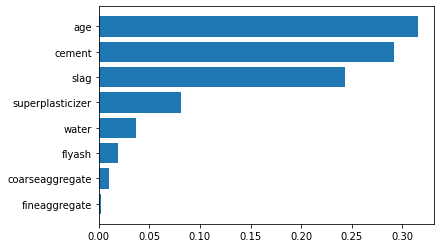

In [ ]:
sorted_idx = rf_reg.feature_importances_.argsort()
features = [c for c in x_train.columns]
result = sorted(zip(features, rf_reg.feature_importances_), key = lambda x: x[1], reverse=False)
plt.barh([x[0] for x in result], [x[1] for x in result])

We are calculating the mean absolute error on both training and testing data. The error rates rates are very low, which is good sign.

In [ ]:
def eval(x,y,reg=None):
  y_rf_pred=rf_reg.predict(x)
  return mean_absolute_error(y,y_rf_pred)

In [ ]:
train_mae = eval(x_train, y_train, reg=pipeline)
test_mae = eval(x_test, y_test, reg=pipeline)
print(f"train MAE = {round(train_mae, 3)}, test MAE = {round(test_mae, 3)} ")

train MAE = 0.107, test MAE = 0.119 


###**Using auto ml to find the best model**

We have implemented automl using H2o. We have imported the required libraries of H2o and initialized H2o.

In [ ]:
! apt-get install default-jre
!java -version
! pip install h2o

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
openjdk version "11.0.15" 2022-04-19
OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1)
OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import psutil
import random, os, sys
import logging
import csv

In [ ]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6 
run_time=222

In [ ]:
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

3


In [ ]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:54143 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpo91ikzx3
  JVM stdout: /tmp/tmpo91ikzx3/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpo91ikzx3/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54143
Connecting to H2O server at http://127.0.0.1:54143 ... successful.


--------------------------  ----------------------------------
H2O_cluster_uptime:         05 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.36.1.1
H2O_cluster_version_age:    23 days
H2O_cluster_name:           H2O_from_python_unknownUser_7wwn09
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.172 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:54143
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.7.13 final
--------------------------  ----------------------------------

After intitalizing H2o , we have imported our dataset. We have then made train and test split of 80% and 20%

In [ ]:
url = "https://media.githubusercontent.com/media/sowmyachinimilli/DS_Assignments/main/Concrete_Data_Yeh.csv"
df_auto = h2o.import_file(path = url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Create a 80/20 train/test split
pct_rows=0.80
df_train, df_test = df_auto.split_frame([pct_rows])
print(df_train.shape)
print(df_test.shape)

(810, 9)
(220, 9)


In [ ]:
# Set the features and target
X=df_auto.columns
X.remove('csMPa')
print(X)

['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age']


In [ ]:
Y='csMPa'
print(Y)

csMPa


In [ ]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)
aml.train(x=X,y=Y,training_frame=df_train) 

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_1_20220506_201247

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 2.341537534870226
RMSE: 1.5302083305452974
MAE: 1.1236194563760953
RMSLE: 0.06031555052186731
R^2: 0.9914000947506932
Mean Residual Deviance: 2.341537534870226
Null degrees of freedom: 809
Residual degrees of freedom: 803
Null deviance: 220542.5930009837
Residual deviance: 1896.645403244883
AIC: 3003.8347254133664

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 17.47640542577449
RMSE: 4.180479090460146
MAE: 2.907378066022121
RMSLE: 0.13679360468366744
R^2: 0.9358133583075524
Mean Residual Deviance: 17.47640542577449
Null degrees of freedom: 809
Residual degrees of freedom: 803
Null deviance: 221075.32173432616
Resi

mean           sd    cv_1_valid  \
0                     mae      2.910548     0.232215      2.798218   
1  mean_residual_deviance     17.551630     4.187482     15.406772   
2                     mse     17.551630     4.187482     15.406772   
3           null_deviance  44215.062000  4453.632000  40556.582000   
4                      r2      0.934368     0.018849      0.934582   
5       residual_deviance   2831.177700   609.288640   2619.151100   
6                    rmse      4.167611     0.477817      3.925146   
7                   rmsle      0.136640     0.010620      0.136156   

     cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid  
0      2.652820      2.818176      3.038809      3.244718  
1     13.682879     17.020205     17.024723     24.623570  
2     13.682879     17.020205     17.024723     24.623570  
3  51027.324000  45986.082000  43216.332000  40289.000000  
4      0.955172      0.942477      0.935590      0.904019  
5   2257.675000   2638.131800   2775.030000   3865.900400  
6      3.699038      4.125555      4.126103      4.962214  
7      0.120791      0.139654      0.136159      0.150440

In [ ]:
print(aml.leaderboard)

model_id rmse mse mae rmsle mean_residual_deviance 
 
 
 StackedEnsemble_AllModels_1_AutoML_1_20220506_201247 4.18048 17.4764 2.90738 0.136794 17.4764 
 StackedEnsemble_AllModels_2_AutoML_1_20220506_201247 4.18136 17.4838 2.9051 0.137169 17.4838 
 StackedEnsemble_BestOfFamily_2_AutoML_1_20220506_201247 4.18282 17.496 2.91711 0.138244 17.496 
 StackedEnsemble_BestOfFamily_3_AutoML_1_20220506_201247 4.20674 17.6966 2.94025 0.137966 17.6966 
 StackedEnsemble_BestOfFamily_4_AutoML_1_20220506_201247 4.21969 17.8058 2.95206 0.137987 17.8058 
 GBM_4_AutoML_1_20220506_201247 4.30835 18.5619 3.00368 0.140351 18.5619 
 GBM_grid_1_AutoML_1_20220506_201247_model_23 4.41934 19.5305 3.07391 0.147111 19.5305 
 GBM_grid_1_AutoML_1_20220506_201247_model_26 4.42723 19.6004 3.06795 0.145097 19.6004 
 GBM_grid_1_AutoML_1_20220506_201247_model_32 4.4391 19.7056 3.09407 0.145378 19.7056 
 XGBoost_grid_1_AutoML_1_20220506_201247_model_4 4.45001 19.8026 3.06977 0.14784 19.8026

In [ ]:
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'GBM_4_AutoML_1_20220506_201247': 5,
 'GLM_1_AutoML_1_20220506_201247': 74,
 'StackedEnsemble_AllModels_1_AutoML_1_20220506_201247': 0,
 'StackedEnsemble_AllModels_2_AutoML_1_20220506_201247': 1,
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20220506_201247': 2,
 'StackedEnsemble_BestOfFamily_3_AutoML_1_20220506_201247': 3,
 'StackedEnsemble_BestOfFamily_4_AutoML_1_20220506_201247': 4}

After running different models on this dataset using automl, we have found that xgboost is the best model of all. We can also notice that rsme of this model is the lowest among all, which is 1.86

In [ ]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])
best_model.algo

5


'gbm'

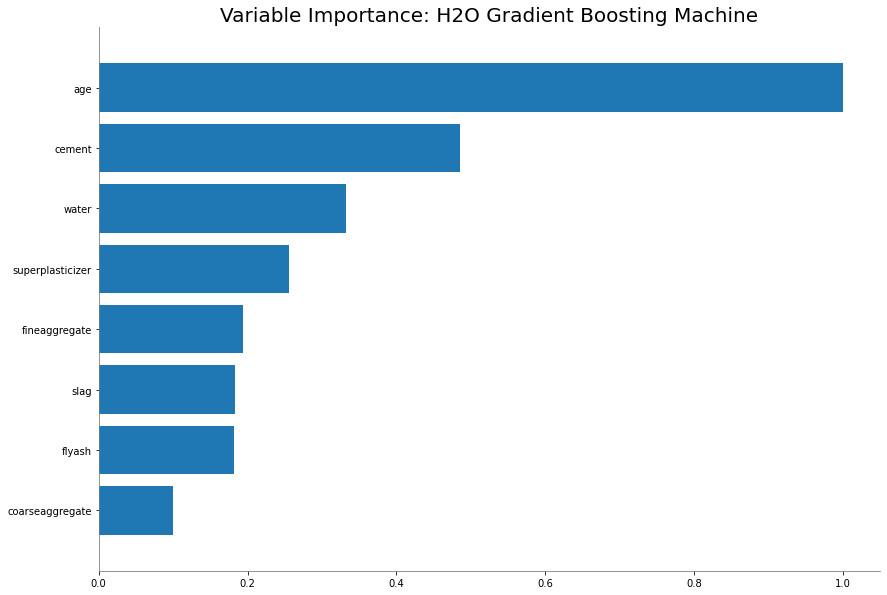

<Figure size 432x288 with 0 Axes>

In [ ]:
if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()

74
glm


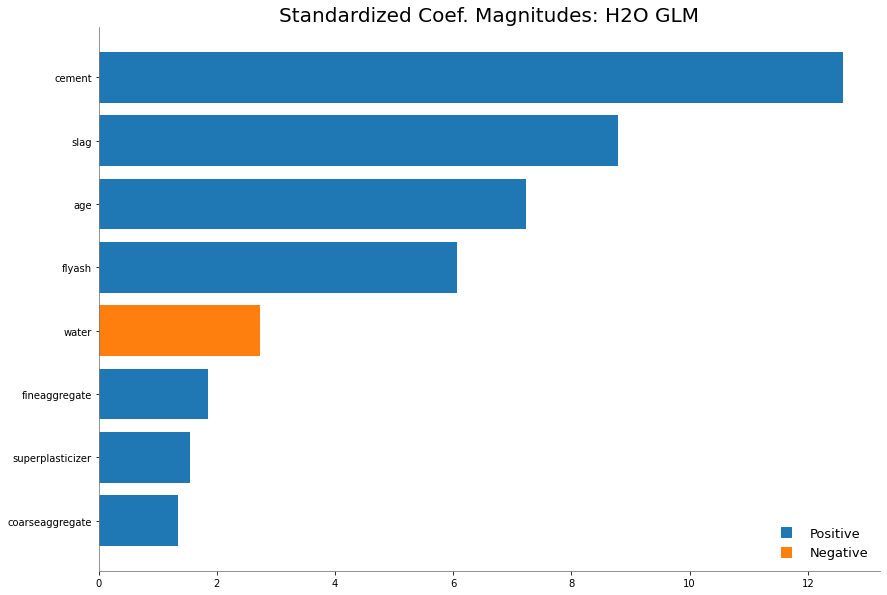

In [ ]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(aml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo) 
  glm_model.std_coef_plot()

In [ ]:
print(best_model.rmse(train = True))

1.5824258601832875


In [ ]:
def model_performance_stats(perf):
    d={}
    try:    
      d['mse']=perf.mse()
    except:
      pass      
    try:    
      d['rmse']=perf.rmse() 
    except:
      pass      
    try:    
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_deviance']=perf.residual_deviance() 
    except:
      pass      
    try:    
      d['null_deviance']=perf.null_deviance() 
    except:
      pass      
    try:    
      d['aic']=perf.aic() 
    except:
      pass      
    try:
      d['logloss']=perf.logloss() 
    except:
      pass    
    try:
      d['auc']=perf.auc()
    except:
      pass  
    try:
      d['gini']=perf.gini()
    except:
      pass    
    return d

In [ ]:
mod_perf=best_model.model_performance(df_test)
stats_test={}
stats_test=model_performance_stats(mod_perf)
stats_test

{'mse': 21.278786804651553,
 'null_degrees_of_freedom': None,
 'null_deviance': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'rmse': 4.61289353927137}

In [ ]:
predictions = best_model.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


Below is the prediction of the target value i.e concrete strength which is predicted using the best model i.e, xgboost . We can also observe the differece in the predicted values and actual values in test dataset.

In [ ]:
Y_pred=h2o.as_list(predictions)
Y_pred[0:5]

predict
0  71.673686
1  41.573726
2  38.387433
3  28.467931
4  40.546241

In [ ]:
Y_test=h2o.as_list(df_test[Y])
Y_test[0:5]

csMPa
0  61.89
1  44.30
2  45.85
3  28.02
4  44.21

**Ridge and Lasso Regularization on GLM Model**

Implemented Ridge and Lasso regularization on GLM Model to reduce overfitting.

In [ ]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
glm_reg_ridge = H2OGeneralizedLinearEstimator(family='gaussian', alpha = 0, nfolds = 5) #RIDGE Regularization
glm_reg_lasso = H2OGeneralizedLinearEstimator(family='gaussian', alpha = 1, nfolds = 5) #LASSO Regularization

In [ ]:
glm_reg_ridge.train(x = X, y = Y, training_frame = df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1651867949023_25


GLM Model: summary


family      link               regularization  \
0    gaussian  identity  Ridge ( lambda = 0.008455 )   

   number_of_predictors_total number_of_active_predictors  \
0                           8                           8   

   number_of_iterations   training_frame  
0                     1  py_266_sid_a944



ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 106.1708259411032
RMSE: 10.303922842350053
MAE: 8.19060546155971
RMSLE: 0.33674492990501376
R^2: 0.6100600439938129
Mean Residual Deviance: 106.1708259411032
Null degrees of freedom: 809
Residual degrees of freedom: 801
Null deviance: 220542.5930009837
Residual deviance: 85998.3690122936
AIC: 6097.370407348524

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 109.86421279628019
RMSE: 10.481613081786609
MAE: 8.299243060566468
RMSLE: 0.3413496125447869
R^2: 0.5964951207198754
Mean Residual Deviance: 109.86421279628019
Null degrees of freedom: 809
Residual degrees of freedom: 801
Null deviance: 221673.33205206756
Residual deviance: 88990.01236498695
AIC: 6125.069014838865

Cross-Validation Metrics Summary: 


mean           sd    cv_1_valid  \
0                     mae      8.320989     0.459390      8.956224   
1  mean_residual_deviance    110.431496    11.222740    125.189064   
2                     mse    110.431496    11.222740    125.189064   
3           null_deviance  44334.668000  2627.828900  41182.492000   
4                      r2      0.590574     0.042233      0.530796   
5       residual_deviance  17798.002000   858.723500  19279.115000   
6                    rmse     10.497809     0.533275     11.188792   
7                   rmsle      0.340151     0.019932      0.354138   

     cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid  
0      8.515308      7.890106      8.384084      7.859220  
1    117.109480    101.916560    110.507380     97.435020  
2    117.109480    101.916560    110.507380     97.435020  
3  41828.020000  46261.086000  45598.402000  46803.332000  
4      0.562301      0.627314      0.609313      0.623144  
5  17449.312000  17223.898000  17791.688000  17245.998000  
6     10.821713     10.095373     10.512249      9.870917  
7      0.313783      0.347924      0.324747      0.360162


Scoring History: 


timestamp    duration  iterations negative_log_likelihood  \
0    2022-05-06 20:16:37   0.000 sec           0            220542.59204   
1    2022-05-06 20:16:37   0.002 sec           1                           

    objective training_rmse training_deviance training_mae training_r2  
0  272.274805                                                           
1                 10.303923        106.170826     8.190605     0.61006


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0            cement            11.598764           1.000000    0.302670
1              slag             7.821964           0.674379    0.204114
2               age             7.117913           0.613679    0.185742
3            flyash             5.196398           0.448013    0.135600
4             water             3.371625           0.290688    0.087983
5  superplasticizer             1.575037           0.135794    0.041101
6     fineaggregate             0.968776           0.083524    0.025280
7   coarseaggregate             0.671013           0.057852    0.017510

In [ ]:
glm_reg_lasso.train(x = X, y = Y, training_frame = df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1651867949023_26


GLM Model: summary


family      link              regularization  \
0    gaussian  identity  Lasso (lambda = 0.008455 )   

   number_of_predictors_total number_of_active_predictors  \
0                           8                           8   

   number_of_iterations   training_frame  
0                     1  py_266_sid_a944



ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 105.89232978978981
RMSE: 10.290399884833914
MAE: 8.153470645041665
RMSLE: 0.3351042225257282
R^2: 0.6110828935009955
Mean Residual Deviance: 105.89232978978981
Null degrees of freedom: 809
Residual degrees of freedom: 801
Null deviance: 220542.5930009837
Residual deviance: 85772.78712972975
AIC: 6095.242908948608

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 110.46732562243152
RMSE: 10.51034374425649
MAE: 8.294676812793655
RMSLE: 0.3392953234599377
R^2: 0.5942800320944313
Mean Residual Deviance: 110.46732562243152
Null degrees of freedom: 809
Residual degrees of freedom: 801
Null deviance: 221589.44397422494
Residual deviance: 89478.53375416953
AIC: 6129.50344681192

Cross-Validation Metrics Summary: 


mean           sd    cv_1_valid  \
0                     mae      8.253952     0.632910      8.391194   
1  mean_residual_deviance    109.244410    15.295417    111.545586   
2                     mse    109.244410    15.295417    111.545586   
3           null_deviance  44317.890000  9625.396000  36598.902000   
4                      r2      0.590807     0.052175      0.519798   
5       residual_deviance  17895.707000  4490.378400  17512.656000   
6                    rmse     10.430772     0.744491     10.561514   
7                   rmsle      0.339293     0.012151      0.331675   

     cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid  
0      8.812873      8.569247      7.173706      8.322740  
1    128.812770    112.494270     86.160230    107.209190  
2    128.812770    112.494270     86.160230    107.209190  
3  59783.750000  47597.496000  38437.266000  39172.030000  
4      0.577412      0.618881      0.659545      0.578396  
5  24989.678000  17886.590000  12579.395000  16510.215000  
6     11.349571     10.606332      9.282253     10.354187  
7      0.340576      0.338853      0.358615      0.326747


Scoring History: 


timestamp    duration  iterations negative_log_likelihood  \
0    2022-05-06 20:16:38   0.000 sec           0            220542.59204   
1    2022-05-06 20:16:38   0.003 sec           1                           

    objective training_rmse training_deviance training_mae training_r2  
0  272.274805                                                           
1                   10.2904         105.89233     8.153471    0.611083


Variable Importances: 


variable  relative_importance  scaled_importance  percentage
0            cement            12.802633           1.000000    0.298518
1              slag             8.993447           0.702469    0.209700
2               age             7.243657           0.565794    0.168900
3            flyash             6.248238           0.488043    0.145690
4             water             2.592718           0.202514    0.060454
5     fineaggregate             2.021150           0.157870    0.047127
6  superplasticizer             1.518026           0.118571    0.035396
7   coarseaggregate             1.467377           0.114615    0.034215

##**Identifying Significant Features**

***Which independent variables are useful to predict a target (dependent variable)? Which predictor variables are the most important?***

Calculating p-value to determine the most significant features.

As per the p-values calculated for the below predictor variables, there are no variables that have p-value greater than 0.05. Therefore, it is evident that the relationsips between the independent and dependent variables are statistically significant.

In [ ]:
import statsmodels.api as sm
from scipy import stats

#assigning the target variable and features to y and x
y = df_new['csMPa']
#x = df_new.iloc[:,:]
#dropping the highly correlated freatures
x = df_new[['age','cement','slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate']]
#calculation p-value to determine the significant features using Ordinary Least Squares (OLS)
#X_sig = sm.add_constant(x_scaled)
est = sm.OLS(y, x)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  csMPa   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                              1310.
Date:                Fri, 06 May 2022   Prob (F-statistic):                        0.00
Time:                        20:16:38   Log-Likelihood:                          555.18
No. Observations:                1030   AIC:                                     -1094.
Df Residuals:                    1022   BIC:                                     -1055.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

##**Feature Importance Using Different Methods**

***Feature Importance based on model coefficients***

Using model coefficients of this linear model, we can get the feature importance of the variables.

Below are the top 5 variables that are useful for the predicting the target variable based on model coefficents.
1. Coarseaggregate
2. Cement
3. Flyash
4. Superplasticizer
5. Slag

age: 0.24969826062986675
cement: -0.8453246572074626
slag: -0.553043447580039
flyash: -0.7384772071190131
water: -0.03573127155650986
superplasticizer: -0.5848428651575861
coarseaggregate: -0.8487772477493691
fineaggregate: -0.15661753167495063


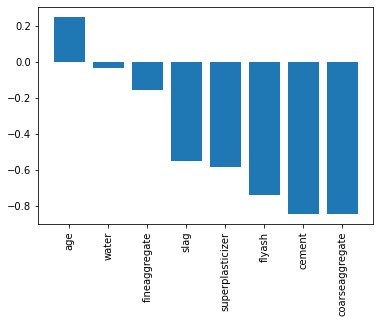

In [ ]:
X = df_new[['age','cement','slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate']]  #independent columns
y = df_new['csMPa']    #target column i.e csMPa

model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': model.coef_
})
for i in range(len(importances)):
  print(importances['Attribute'][i],end=": ")
  print(importances['Importance'][i],end="\n")
# plot feature importance
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.xticks(rotation='vertical')
plt.show()

***Feature importance from tree based methods***

Using tree based methods also, we can get the feature importance of the variables. Here, we are using XGBClassifier for the same.

Below are the top 5 variables that are useful for the predicting the target variable for this model.
1. Flyash
2. Slag
3. Water
4. Coarseaggregate
5. Cement

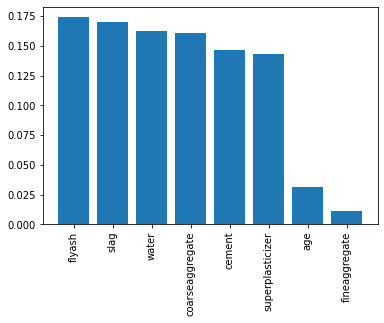

In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X, y)
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.xticks(rotation='vertical')
plt.show()

***Feature Importance using SHAP values***

In [ ]:
!pip install -q shap # Run this if you do not have shap installed
import shap

In [ ]:
# load JS visualization code to notebook
shap.initjs()

# train XGBoost model
X,y = x_train,y_train
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

From the above plot we can see that-

Base value is 0.43. It is the value that would be predicted if we did not know any features for the any test output. It is the mean prediction of Y_test.

Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.

Cement and Slag have positive impact on predicting the concrete strength.

Coarseaggregate, age, superplasticizer, flyash, fineaggregate have negative impact on the prediction of concrete strength. They are pushing the prediction to the left.

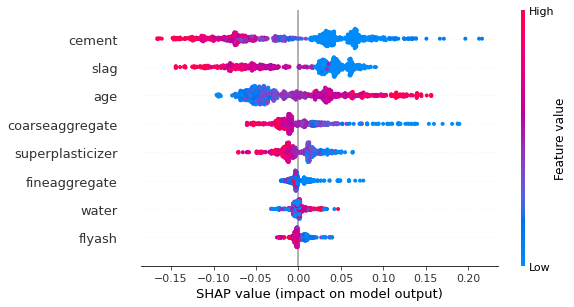

In [ ]:
shap.summary_plot(shap_values, X)

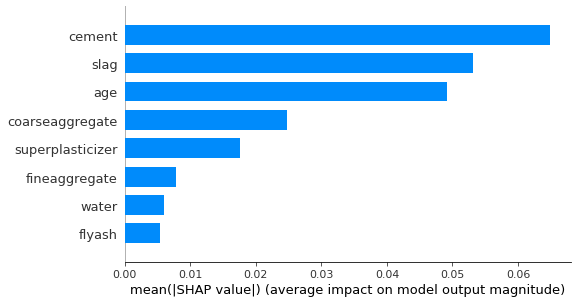

In [ ]:
shap.summary_plot(shap_values, X, plot_type="bar")

##**Imputation Methods On Missing data**

***Remove 1%, 5%, and 10% of your data randomly and impute the values back using at least 3 imputation methods. How well did the methods recover the missing values?  That is to remove some data, check the % error on residuals for numeric data and check for bias and variance of the error.***

###**Creating 3 columns for 'cement' feature with 1%, 5% and 10% missing data**

We have created three types of datasets with 1%, 5% and 10% missing data.

In [ ]:
def create_missing_data(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac = percent).index, col] = np.nan

In [ ]:
def get_percent_missing(dataframe):
    
    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame({'column_name': dataframe.columns,
                                     'percent_missing': percent_missing})
    return missing_value_df

Creating a data frame with 1% missing data in 'cement' feature

In [ ]:
df_cement_1percentMissing=df_new[['age','slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate']]
df_cement_1percentMissing['cement_1_percent']=df_new[['cement']]
df_cement_1percentMissing.head(10)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


age  slag    flyash    water  superplasticizer  coarseaggregate  \
0  0.967485   0.0  0.321086  0.07764          0.694767         0.205720   
1  0.741996   0.0  0.321086  0.07764          0.738372         0.205720   
2  0.472655   0.0  0.848243  0.00000          0.380814         0.000000   
3  0.482372   0.0  0.848243  0.00000          0.380814         0.000000   
4  0.522860   0.0  0.560703  0.00000          0.515698         0.580783   
5  0.556871   0.0  0.848243  0.00000          0.380814         0.190667   
6  0.515386   0.0  0.848243  0.00000          0.380814         0.000000   
7  0.425065   0.0  0.848243  0.00000          0.380814         0.000000   
8  0.542170   0.0  0.848243  0.00000          0.380814         0.190667   
9  0.460446   0.0  0.848243  0.00000          0.380814         0.000000   

   fineaggregate  cement_1_percent  
0       0.074176          0.000000  
1       0.074176          0.000000  
2       0.739011          0.396494  
3       1.000000          0.396494  
4       0.986264          0.368392  
5       0.244505          0.317195  
6       1.000000          0.264329  
7       0.074176          0.264329  
8       0.074176          0.317195  
9       0.074176          0.000000

In [ ]:
df_cement_1percentMissing['cement_1_percent'].isnull().sum()

0

In [ ]:
create_missing_data(df_cement_1percentMissing, 0.01, 'cement_1_percent')


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df_cement_1percentMissing['cement_1_percent'].isnull().sum()

10

In [ ]:
print(get_percent_missing(df_cement_1percentMissing))

                       column_name  percent_missing
age                            age         0.000000
slag                          slag         0.000000
flyash                      flyash         0.000000
water                        water         0.000000
superplasticizer  superplasticizer         0.000000
coarseaggregate    coarseaggregate         0.000000
fineaggregate        fineaggregate         0.000000
cement_1_percent  cement_1_percent         0.970874


Creating a data frame with 5% missing data in 'cement' feature

In [ ]:
df_cement_5percentMissing=df_new[['age','slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate']]
df_cement_5percentMissing['cement_5_percent']=df_new[['cement']]
df_cement_5percentMissing.head(10)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


age  slag    flyash    water  superplasticizer  coarseaggregate  \
0  0.967485   0.0  0.321086  0.07764          0.694767         0.205720   
1  0.741996   0.0  0.321086  0.07764          0.738372         0.205720   
2  0.472655   0.0  0.848243  0.00000          0.380814         0.000000   
3  0.482372   0.0  0.848243  0.00000          0.380814         0.000000   
4  0.522860   0.0  0.560703  0.00000          0.515698         0.580783   
5  0.556871   0.0  0.848243  0.00000          0.380814         0.190667   
6  0.515386   0.0  0.848243  0.00000          0.380814         0.000000   
7  0.425065   0.0  0.848243  0.00000          0.380814         0.000000   
8  0.542170   0.0  0.848243  0.00000          0.380814         0.190667   
9  0.460446   0.0  0.848243  0.00000          0.380814         0.000000   

   fineaggregate  cement_5_percent  
0       0.074176          0.000000  
1       0.074176          0.000000  
2       0.739011          0.396494  
3       1.000000          0.396494  
4       0.986264          0.368392  
5       0.244505          0.317195  
6       1.000000          0.264329  
7       0.074176          0.264329  
8       0.074176          0.317195  
9       0.074176          0.000000

In [ ]:
df_cement_5percentMissing['cement_5_percent'].isnull().sum()

0

In [ ]:
create_missing_data(df_cement_5percentMissing, 0.05, 'cement_5_percent')


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df_cement_5percentMissing['cement_5_percent'].isnull().sum()

52

In [ ]:
print(get_percent_missing(df_cement_5percentMissing))

                       column_name  percent_missing
age                            age         0.000000
slag                          slag         0.000000
flyash                      flyash         0.000000
water                        water         0.000000
superplasticizer  superplasticizer         0.000000
coarseaggregate    coarseaggregate         0.000000
fineaggregate        fineaggregate         0.000000
cement_5_percent  cement_5_percent         5.048544


Creating a data frame with 10% missing data in 'cement' feature

In [ ]:
df_cement_10percentMissing=df[['age','slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate']]
df_cement_10percentMissing['cement_10_percent']=df[['cement']]
df_cement_10percentMissing.head(10)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


age  slag    flyash    water  superplasticizer  coarseaggregate  \
0  0.967485   0.0  0.321086  0.07764          0.694767         0.205720   
1  0.741996   0.0  0.321086  0.07764          0.738372         0.205720   
2  0.472655   0.0  0.848243  0.00000          0.380814         0.000000   
3  0.482372   0.0  0.848243  0.00000          0.380814         0.000000   
4  0.522860   0.0  0.560703  0.00000          0.515698         0.580783   
5  0.556871   0.0  0.848243  0.00000          0.380814         0.190667   
6  0.515386   0.0  0.848243  0.00000          0.380814         0.000000   
7  0.425065   0.0  0.848243  0.00000          0.380814         0.000000   
8  0.542170   0.0  0.848243  0.00000          0.380814         0.190667   
9  0.460446   0.0  0.848243  0.00000          0.380814         0.000000   

   fineaggregate  cement_10_percent  
0       0.074176           0.000000  
1       0.074176           0.000000  
2       0.739011           0.396494  
3       1.000000           0.396494  
4       0.986264           0.368392  
5       0.244505           0.317195  
6       1.000000           0.264329  
7       0.074176           0.264329  
8       0.074176           0.317195  
9       0.074176           0.000000

In [ ]:
df_cement_10percentMissing['cement_10_percent'].isnull().sum()

0

In [ ]:
create_missing_data(df_cement_10percentMissing, 0.1, 'cement_10_percent')


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df_cement_10percentMissing['cement_10_percent'].isnull().sum()

103

In [ ]:
print(get_percent_missing(df_cement_10percentMissing))

                         column_name  percent_missing
age                              age              0.0
slag                            slag              0.0
flyash                        flyash              0.0
water                          water              0.0
superplasticizer    superplasticizer              0.0
coarseaggregate      coarseaggregate              0.0
fineaggregate          fineaggregate              0.0
cement_10_percent  cement_10_percent             10.0


###**Imputation with Mean**

We are now imputing the 3 datasets that we created in 5.1 using mean of that column i.e, 'cement'

A new dataset with the imputed mean values for the 1% missing dataset is created below.

In [ ]:
df_cement1_MeanIMP=df_cement_1percentMissing.fillna(df_cement_1percentMissing.mean())

Now to confirm if the missing data is imputed correctly, we are checking if there are any null values.

In [ ]:
df_cement1_MeanIMP.isnull().sum()

age                 0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
cement_1_percent    0
dtype: int64

Below is the observation to verify the percent change on how well the data has been imputed.

In [ ]:
abs((df_cement1_MeanIMP['cement_1_percent']-df_new['cement'])/(df_new['cement']+0.0000001))

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1025    0.0
1026    0.0
1027    0.0
1028    0.0
1029    0.0
Length: 1030, dtype: float64

A new dataset with the imputed mean values for the 5% missing dataset is created below.

In [ ]:
df_cement5_MeanIMP=df_cement_5percentMissing.fillna(df_cement_5percentMissing.mean())

Now to confirm if the missing data is imputed correctly, we are checking if there are any null values.

In [ ]:
df_cement5_MeanIMP.isnull().sum()

age                 0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
cement_5_percent    0
dtype: int64

Below is the observation to verify the percent change on how well the data has been imputed.

In [ ]:
abs((df_cement5_MeanIMP['cement_5_percent']-df_new['cement'])/(df_new['cement']+0.0000001))

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1025    0.0
1026    0.0
1027    0.0
1028    0.0
1029    0.0
Length: 1030, dtype: float64

A new dataset with the imputed mean values for the 10% missing dataset is created below.

In [ ]:
df_cement10_MeanIMP=df_cement_10percentMissing.fillna(df_cement_10percentMissing.mean())

Now to confirm if the missing data is imputed correctly, we are checking if there are any null values.

In [ ]:
df_cement10_MeanIMP.isnull().sum()

age                  0
slag                 0
flyash               0
water                0
superplasticizer     0
coarseaggregate      0
fineaggregate        0
cement_10_percent    0
dtype: int64

Below is the observation to verify the percent change on how well the data has been imputed.

In [ ]:
abs((df_cement10_MeanIMP['cement_10_percent']-df['cement'])/(df['cement']+0.000001))

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1025    0.0
1026    0.0
1027    0.0
1028    0.0
1029    0.0
Length: 1030, dtype: float64

###**Imputation with KNN**

We are now imputing the 3 datasets that we created in 5.1 using K-nearest neighbours of that column i.e, 'cement'

A new dataset with the imputed mean values for the 1% missing dataset is created below.

In [ ]:
print(get_percent_missing(df_cement_1percentMissing))

                       column_name  percent_missing
age                            age         0.000000
slag                          slag         0.000000
flyash                      flyash         0.000000
water                        water         0.000000
superplasticizer  superplasticizer         0.000000
coarseaggregate    coarseaggregate         0.000000
fineaggregate        fineaggregate         0.000000
cement_1_percent  cement_1_percent         0.970874


In [ ]:
#Creating a seperate dataframe for performing the KNN imputation
imputer = KNNImputer(n_neighbors=5)
df_cement1_KNNIMP = pd.DataFrame(imputer.fit_transform(df_cement_1percentMissing), columns = df_cement_1percentMissing.columns)

In [ ]:
df_cement1_KNNIMP.sample(10)

age      slag    flyash     water  superplasticizer  \
29    0.451850  0.000000  0.848243  0.000000          0.380814   
896   0.624268  0.000000  0.448882  0.310559          0.337209   
344   0.189859  0.873063  0.263578  0.316770          0.734012   
231   0.540426  0.122439  0.478435  0.214286          0.769767   
1029  0.374611  0.391304  0.629393  0.267081          0.184593   
794   0.304099  0.000000  0.648562  0.000000          0.502907   
521   0.271583  0.704648  0.456869  0.170807          0.119186   
294   0.063162  0.621189  0.291534  0.335404          0.813372   
926   0.352809  0.819590  0.640575  0.310559          0.055233   
901   0.343092  0.664668  0.560703  0.248447          0.037791   

      coarseaggregate  fineaggregate  cement_1_percent  
29           0.000000       0.016484          0.000000  
896          0.413949       0.074176          0.447969  
344          0.457602       0.005495          0.000000  
231          0.480181       0.074176          0.272955  
1029         0.420221       0.074176          0.279633  
794          0.559458       0.491758          0.000000  
521          0.519318       0.016484          0.041736  
294          0.507275       0.005495          0.117418  
926          0.215755       0.074176          0.595437  
901          0.529353       0.074176          0.473011

Now to confirm if the missing data is imputed correctly, we are checking if there are any null values.

In [ ]:
print(get_percent_missing(df_cement1_KNNIMP))

                       column_name  percent_missing
age                            age              0.0
slag                          slag              0.0
flyash                      flyash              0.0
water                        water              0.0
superplasticizer  superplasticizer              0.0
coarseaggregate    coarseaggregate              0.0
fineaggregate        fineaggregate              0.0
cement_1_percent  cement_1_percent              0.0


Below is the observation to verify the percent change on how well the data has been imputed.

In [ ]:
abs((df_cement1_KNNIMP['cement_1_percent']-df_new['cement'])/(df_new['cement']+0.000001))

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1025    0.0
1026    0.0
1027    0.0
1028    0.0
1029    0.0
Length: 1030, dtype: float64

A new dataset with the imputed mean values for the 5% missing dataset is created below.

In [ ]:
print(get_percent_missing(df_cement_5percentMissing))

                       column_name  percent_missing
age                            age         0.000000
slag                          slag         0.000000
flyash                      flyash         0.000000
water                        water         0.000000
superplasticizer  superplasticizer         0.000000
coarseaggregate    coarseaggregate         0.000000
fineaggregate        fineaggregate         0.000000
cement_5_percent  cement_5_percent         5.048544


In [ ]:
#Creating a seperate dataframe for performing the KNN imputation
imputer = KNNImputer(n_neighbors=5)
df_cement5_KNNIMP = pd.DataFrame(imputer.fit_transform(df_cement_5percentMissing), columns = df_cement_5percentMissing.columns)

In [ ]:
df_cement5_KNNIMP.sample(10)

age      slag    flyash     water  superplasticizer  \
968  0.136539  0.828086  0.466454  0.310559          0.465116   
515  0.244674  0.704648  0.672524  0.052795          0.409884   
468  0.630746  0.870565  0.298722  0.363354          0.705233   
788  0.196836  0.000000  0.560703  0.000000          0.715116   
209  0.095926  0.591204  0.588658  0.142857          0.663953   
435  0.484241  0.642679  0.428914  0.242236          0.596802   
945  0.424941  0.516242  0.626997  0.229814          0.334302   
415  0.076741  0.478261  0.559105  0.164596          0.429942   
208  0.464433  0.607696  0.467252  0.177019          0.745930   
800  0.141772  0.000000  0.504792  0.000000          0.901163   

     coarseaggregate  fineaggregate  cement_5_percent  
968         0.529102       0.074176          0.000000  
515         0.519318       0.074176          0.030607  
468         0.446312       0.271978          0.000000  
788         0.531862       0.016484          0.116528  
209         0.412945       0.005495          0.000000  
435         0.382840       0.074176          0.361436  
945         0.399900       0.074176          0.368948  
415         0.660311       0.005495          0.000000  
208         0.464877       0.271978          0.000000  
800         0.476668       0.016484          0.000000

Now to confirm if the missing data is imputed correctly, we are checking if there are any null values.

In [ ]:
print(get_percent_missing(df_cement5_KNNIMP))

                       column_name  percent_missing
age                            age              0.0
slag                          slag              0.0
flyash                      flyash              0.0
water                        water              0.0
superplasticizer  superplasticizer              0.0
coarseaggregate    coarseaggregate              0.0
fineaggregate        fineaggregate              0.0
cement_5_percent  cement_5_percent              0.0


Below is the observation to verify the percent change on how well the data has been imputed.

In [ ]:
abs((df_cement5_KNNIMP['cement_5_percent']-df_new['cement'])/(df_new['cement']+0.000001))

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1025    0.0
1026    0.0
1027    0.0
1028    0.0
1029    0.0
Length: 1030, dtype: float64

A new dataset with the imputed mean values for the 10% missing dataset is created below.

In [ ]:
print(get_percent_missing(df_cement_10percentMissing))

                         column_name  percent_missing
age                              age              0.0
slag                            slag              0.0
flyash                        flyash              0.0
water                          water              0.0
superplasticizer    superplasticizer              0.0
coarseaggregate      coarseaggregate              0.0
fineaggregate          fineaggregate              0.0
cement_10_percent  cement_10_percent             10.0


In [ ]:
#Creating a seperate dataframe for performing the KNN imputation
imputer = KNNImputer(n_neighbors=5)
df_cement10_KNNIMP = pd.DataFrame(imputer.fit_transform(df_cement_10percentMissing), columns = df_cement_10percentMissing.columns)

In [ ]:
df_cement10_KNNIMP.sample(10)

age      slag    flyash     water  superplasticizer  \
956  0.263984  0.458271  0.488019  0.220497          0.443023   
412  0.164320  0.834583  0.337061  0.245342          0.599709   
656  0.113118  0.000000  0.560703  0.000000          0.477907   
276  0.340351  0.591204  0.532748  0.180124          0.661047   
204  0.126324  0.607696  0.467252  0.177019          0.745930   
886  0.194593  0.684658  0.289137  0.496894          0.584302   
243  0.480005  0.590705  0.586262  0.189441          0.660174   
763  0.049084  0.000000  0.512780  0.000000          0.479651   
721  0.118600  0.000000  0.560703  0.000000          0.613372   
598  0.135667  0.000000  0.600639  0.000000          0.485465   

     coarseaggregate  fineaggregate  cement_10_percent  
956         0.467386       0.074176           0.327212  
412         0.441796       0.005495           0.209794  
656         0.532363       0.005495           0.370061  
276         0.410687       0.074176           0.000000  
204         0.464877       0.005495           0.000000  
886         0.592072       0.074176           0.000000  
243         0.410437       0.271978           0.000000  
763         0.423984       0.000000           0.000000  
721         0.592072       0.005495           0.000000  
598         0.469142       0.005495           0.000000

Now to confirm if the missing data is imputed correctly, we are checking if there are any null values.

In [ ]:
print(get_percent_missing(df_cement10_KNNIMP))

                         column_name  percent_missing
age                              age              0.0
slag                            slag              0.0
flyash                        flyash              0.0
water                          water              0.0
superplasticizer    superplasticizer              0.0
coarseaggregate      coarseaggregate              0.0
fineaggregate          fineaggregate              0.0
cement_10_percent  cement_10_percent              0.0


Below is the observation to verify the percent change on how well the data has been imputed.

In [ ]:
abs((df_cement10_KNNIMP['cement_10_percent']-df_new['cement'])/(df_new['cement']+0.000001))

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1025    0.0
1026    0.0
1027    0.0
1028    0.0
1029    0.0
Length: 1030, dtype: float64

###**MICE using Iterative Imputer**

We are now imputing the 3 datasets that we created in 5.1 using Iterative Imputer on that column 'cement'

MICE imputation with 1% mising data

In [ ]:
print(get_percent_missing(df_cement_1percentMissing))

                       column_name  percent_missing
age                            age         0.000000
slag                          slag         0.000000
flyash                      flyash         0.000000
water                        water         0.000000
superplasticizer  superplasticizer         0.000000
coarseaggregate    coarseaggregate         0.000000
fineaggregate        fineaggregate         0.000000
cement_1_percent  cement_1_percent         0.970874


In [ ]:
# define imputer
imputer = IterativeImputer()
# fit on the dataset
imputer.fit(df_cement_1percentMissing)
# transform the dataset
df_cement1_MICEIMP = pd.DataFrame(imputer.transform(df_cement_1percentMissing))

In [ ]:
df_cement1_MICEIMP

0         1         2         3         4         5         6  \
0     0.967485  0.000000  0.321086  0.077640  0.694767  0.205720  0.074176   
1     0.741996  0.000000  0.321086  0.077640  0.738372  0.205720  0.074176   
2     0.472655  0.000000  0.848243  0.000000  0.380814  0.000000  0.739011   
3     0.482372  0.000000  0.848243  0.000000  0.380814  0.000000  1.000000   
4     0.522860  0.000000  0.560703  0.000000  0.515698  0.580783  0.986264   
...        ...       ...       ...       ...       ...       ...       ...   
1025  0.522611  0.451274  0.461661  0.276398  0.200872  0.437280  0.074176   
1026  0.359412  0.577711  0.592652  0.322981  0.049128  0.550426  0.074176   
1027  0.266226  0.542729  0.566294  0.189441  0.265698  0.466633  0.074176   
1028  0.379220  0.000000  0.429712  0.350932  0.548256  0.488961  0.074176   
1029  0.374611  0.391304  0.629393  0.267081  0.184593  0.420221  0.074176   

             7  
0     0.000000  
1     0.000000  
2     0.396494  
3     0.396494  
4     0.368392  
...        ...  
1025  0.322760  
1026  0.000000  
1027  0.387869  
1028  0.519477  
1029  0.279633  

[1030 rows x 8 columns]

Now to confirm if the missing data is imputed correctly, we are checking if there are any null values.

In [ ]:
print(get_percent_missing(df_cement1_MICEIMP))

   column_name  percent_missing
0            0              0.0
1            1              0.0
2            2              0.0
3            3              0.0
4            4              0.0
5            5              0.0
6            6              0.0
7            7              0.0


Below is the observation to verify the percent change on how well the data has been imputed.

In [ ]:
abs((df_cement1_MICEIMP[7]-df_new['cement'])/(df_new['cement']+0.000001))

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1025    0.0
1026    0.0
1027    0.0
1028    0.0
1029    0.0
Length: 1030, dtype: float64

MICE Imputation with 5% missing data

In [ ]:
print(get_percent_missing(df_cement_5percentMissing))

                       column_name  percent_missing
age                            age         0.000000
slag                          slag         0.000000
flyash                      flyash         0.000000
water                        water         0.000000
superplasticizer  superplasticizer         0.000000
coarseaggregate    coarseaggregate         0.000000
fineaggregate        fineaggregate         0.000000
cement_5_percent  cement_5_percent         5.048544


In [ ]:
# define imputer
imputer = IterativeImputer()
# fit on the dataset
imputer.fit(df_cement_5percentMissing)
# transform the dataset
df_cement5_MICEIMP = pd.DataFrame(imputer.transform(df_cement_5percentMissing))

Now to confirm if the missing data is imputed correctly, we are checking if there are any null values.

In [ ]:
print(get_percent_missing(df_cement5_MICEIMP))

   column_name  percent_missing
0            0              0.0
1            1              0.0
2            2              0.0
3            3              0.0
4            4              0.0
5            5              0.0
6            6              0.0
7            7              0.0


Below is the observation to verify the percent change on how well the data has been imputed.

In [ ]:
abs((df_cement5_MICEIMP[7]-df_new['cement'])/(df_new['cement']+0.000001))

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1025    0.0
1026    0.0
1027    0.0
1028    0.0
1029    0.0
Length: 1030, dtype: float64

MICE Imputation with 10% missing data

In [ ]:
print(get_percent_missing(df_cement_10percentMissing))

                         column_name  percent_missing
age                              age              0.0
slag                            slag              0.0
flyash                        flyash              0.0
water                          water              0.0
superplasticizer    superplasticizer              0.0
coarseaggregate      coarseaggregate              0.0
fineaggregate          fineaggregate              0.0
cement_10_percent  cement_10_percent             10.0


In [ ]:
# define imputer
imputer = IterativeImputer()
# fit on the dataset
imputer.fit(df_cement_10percentMissing)
# transform the dataset
df_cement10_MICEIMP = pd.DataFrame(imputer.transform(df_cement_10percentMissing))

Now to confirm if the missing data is imputed correctly, we are checking if there are any null values.

In [ ]:
print(get_percent_missing(df_cement10_MICEIMP))

   column_name  percent_missing
0            0              0.0
1            1              0.0
2            2              0.0
3            3              0.0
4            4              0.0
5            5              0.0
6            6              0.0
7            7              0.0


Below is the observation to verify the percent change on how well the data has been imputed.

In [ ]:
abs((df_cement10_MICEIMP[7]-df_new['cement'])/(df_new['cement']+0.000001))

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1025    0.0
1026    0.0
1027    0.0
1028    0.0
1029    0.0
Length: 1030, dtype: float64

##**Run SHAP analysis on the models from steps 1, 2, and 3,   interpret the SHAP values and compare them with the other model interpretability methods**

In [ ]:
!pip install -q shap # Run this if you do not have shap installed
import shap
shap.initjs()

###**Interpreting SHAP values and SHAP analysis on Linear Regression Model**

For a sample in the data , we have predicted the target value using linear regression model that we defined in step 1 and compared it with the actual value in test data set.

In [ ]:
x_test.iloc[0: 1]

age  cement      slag     water    flyash  coarseaggregate  \
339  0.243927     0.0  0.587206  0.295031  0.423323         0.400151   

     fineaggregate  superplasticizer  
339       0.005495          0.644767

In [ ]:
sample_prediction = lreg.predict(x_test.iloc[0: 1])
print(f"Current Prediction: {sample_prediction}, Actual value: {y_test.iloc[0:1]}")

Current Prediction: 339    0.336713
dtype: float64, Actual value: 339    0.445662
Name: csMPa, dtype: float64


***Shap analysis***

We have calculated the SHAP values below and developed shap plots such as force plots and summary plots to understand the impact of each feature on the target value.

In [ ]:
explainer = shap.Explainer(lreg.predict, x_train)
shap_values = explainer(x_test)

In [ ]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

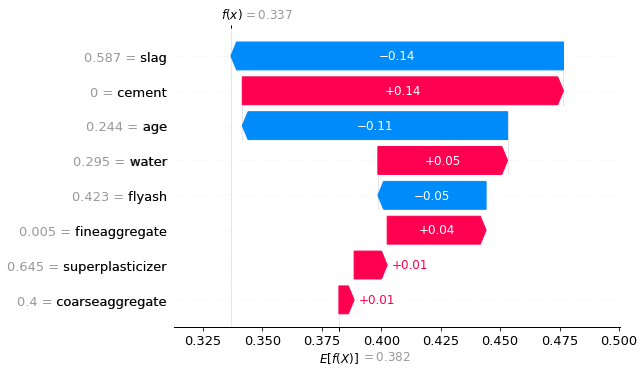

In [ ]:
sample_feature_importance(0, 'waterfall')

In [ ]:
shap.initjs()
sample_feature_importance(0, 'condensed')

***Feature Importance***

Below plots show the feature importance of the predictor variables and their impact on the target variable

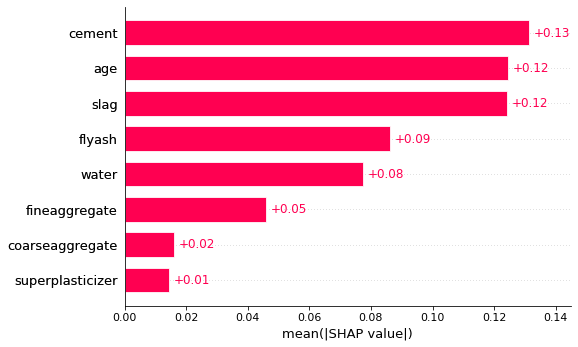

In [ ]:
shap.plots.bar(shap_values)

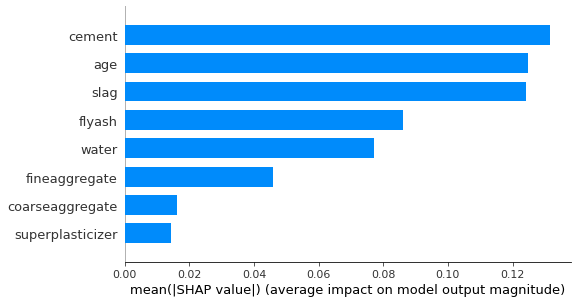

In [ ]:
shap.summary_plot(shap_values.values, x_train,plot_type='bar')

***Comparing the above with other model interpretability model : Partial Dependency Plots***

We are comparing the shap values with partial dependency plots of each feature using linear regression model in step1. These plots of each feature shows the functional dependence between the input variables and predictions

In [ ]:
def partial_dependence_plot(feature, idx=None):
    if idx is None: # visualize all samples
        shap.plots.partial_dependence(
            feature,
            lreg.predict,
            x_train, 
            ice=False,
            model_expected_value=True, 
            feature_expected_value=True)
    else: # visualize sample idx
        shap.partial_dependence_plot(
            feature, 
            lreg.predict,
            x_train, 
            ice=False,
            model_expected_value=True, 
            feature_expected_value=True,
            shap_values=shap_values[idx:idx+1,:])

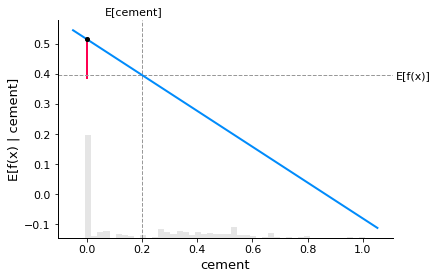

In [ ]:
partial_dependence_plot('cement',0)

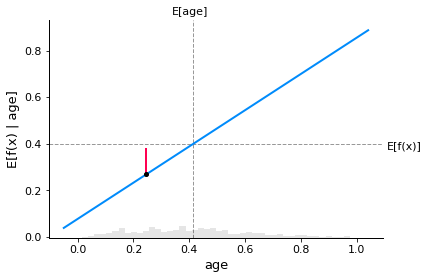

In [ ]:
partial_dependence_plot('age',0)

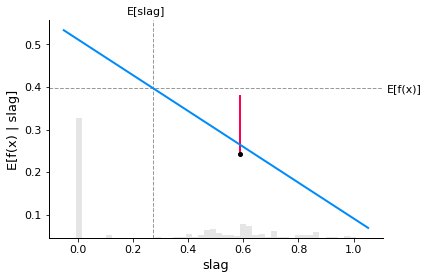

In [ ]:
partial_dependence_plot('slag',0)

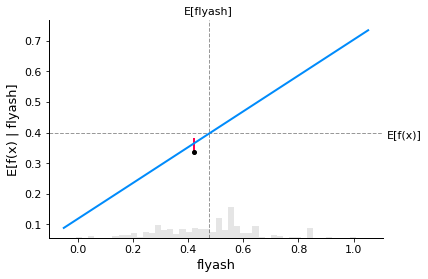

In [ ]:
partial_dependence_plot('flyash',0)

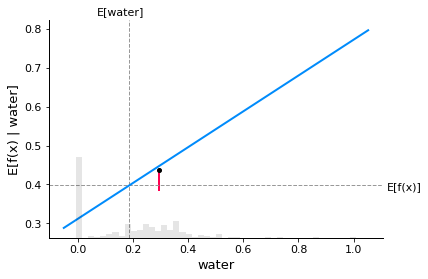

In [ ]:
partial_dependence_plot('water',0)

###**Interpreting SHAP values and SHAP analysis on a Tree Based Method: RandomForestRegressor**

For a sample in the data , we have predicted the target value using a tree based mmodel: random forest regressor, that we defined in step 2 

In [ ]:
# load JS visualization code to notebook

explainer = shap.TreeExplainer(rf_reg)
shap_values = explainer.shap_values(x_train)

***Shap Analysis***


We have calculated the SHAP values below and developed shap plots such as force plots and summary plots to understand the impact of each feature on the target value.

In [ ]:
shap.initjs()
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0], x_train.iloc[0])

From the above plot we can see that-

Base value is 0.488. It is the value that would be predicted if we did not know any features for the any test output. It is the mean prediction of Y_test.

Features pushing the prediction higher are shown in red, those pushing the prediction lower are in blue.

Cement,water and Slag have positive impact on predicting the concrete strength.

Coarseaggregate, age, superplasticizer, flyash, fineaggregate have negative impact on the prediction of concrete strength. They are pushing the prediction to the left.

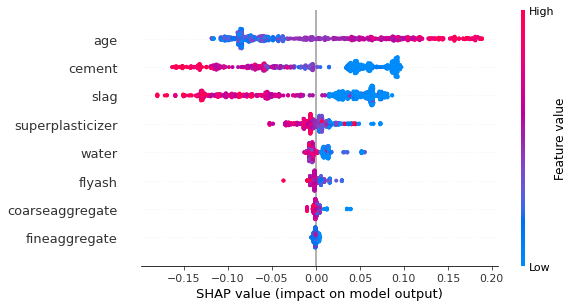

In [ ]:
shap.summary_plot(shap_values, x_train)

***Comparing the above with other model interpretability model : Partial Dependency Plots***

We are comparing the shap values with partial dependency plots of each feature using random forest regressor in step2. These plots of each feature shows the functional dependence between the input variables and predictions

In [ ]:
def partial_dependence_plot(feature):
        shap.plots.partial_dependence(
            feature,
            pipeline.predict,
            x_train, 
            ice=False,
            model_expected_value=True, 
            feature_expected_value=True)

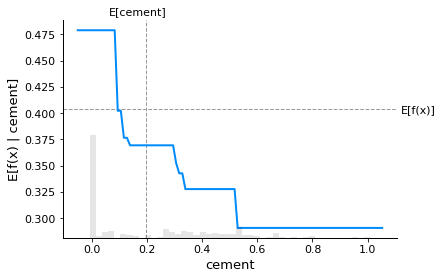

In [ ]:
partial_dependence_plot('cement')

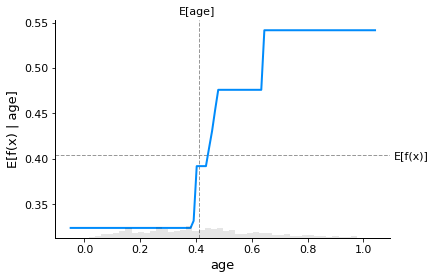

In [ ]:
partial_dependence_plot('age')

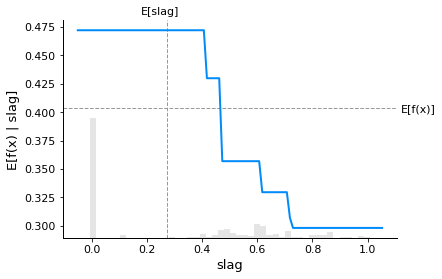

In [ ]:
partial_dependence_plot('slag')

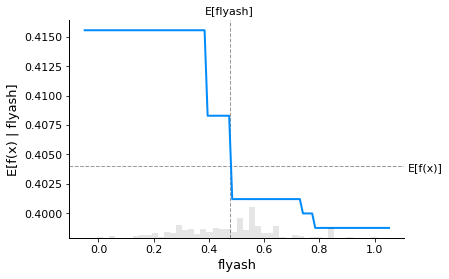

In [ ]:
partial_dependence_plot('flyash')

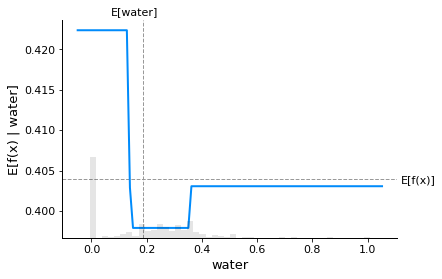

In [ ]:
partial_dependence_plot('water')

###**Interpreting SHAP values and SHAP analysis on Automl**

Using H2o's explain method we can see everything that is needed, i.e, the model variable importance plot, SHAP summary plot, Partial dependency plot etc.

From the below graphs we can observe the SHAP summary plot which determines the impact of the feature variables on the target variable.

Also, partial dependency plots are depicted to show the impact of the variable on the outocome variable. The partial dependency plots here shows ensembeled model , xgboost, gbm models also, in the interpretation of each feature.

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id rmse mse mae rmsle mean_residual_deviance training_time_ms predict_time_per_row_ms algo 
 
 
 StackedEnsemble_AllModels_1_AutoML_1_20220506_201247 4.18048 17.4764 2.90738 0.136794 17.4764 370 0.267136 StackedEnsemble 
 StackedEnsemble_AllModels_2_AutoML_1_20220506_201247 4.18136 17.4838 2.9051 0.137169 17.4838 413 0.38033 StackedEnsemble 
 StackedEnsemble_BestOfFamily_2_AutoML_1_20220506_201247 4.18282 17.496 2.91711 0.138244 17.496 337 0.210599 StackedEnsemble 
 StackedEnsemble_BestOfFamily_3_AutoML_1_20220506_201247 4.20674 17.6966 2.94025 0.137966 17.6966 319 0.130866 StackedEnsemble 
 StackedEnsemble_BestOfFamily_4_AutoML_1_20220506_201247 4.21969 17.8058 2.95206 0.137987 17.8058 196 0.156948 StackedEnsemble 
 GBM_4_AutoML_1_20220506_201247 4.30835 18.5619 3.00368 0.140351 18.5619 989 0.092681 GBM 
 GBM_grid_1_AutoML_1_20220506_201247_model_23 4.41934 19.5305 3.07391 0.147111 19.5305 400 0.044684 GBM 
 GBM_grid_1_AutoML_1_20220506_201247_model_26 4.42723 19.6004 3.06795 0.145097 19.6004 367 0.150564 GBM 
 GBM_grid_1_AutoML_1_20220506_201247_model_32 4.4391 19.7056 3.09407 0.145378 19.7056 375 0.103081 GBM 
 XGBoost_grid_1_AutoML_1_20220506_201247_model_4 4.45001 19.8026 3.06977 0.14784 19.8026 293 0.018183 XGBoost 
 GBM_grid_1_AutoML_1_20220506_201247_model_5 4.48611 20.1252 3.14082 0.144192 20.1252 589 0.166867 GBM 
 GBM_3_AutoML_1_20220506_201247 4.49208 20.1788 3.1735 0.14564 20.1788 770 0.127232 GBM 
 GBM_2_AutoML_1_20220506_201247 4.50928 20.3336 3.20248 0.148615 20.3336 789 0.101843 GBM 
 GBM_grid_1_AutoML_1_20220506_201247_model_10 4.50967 20.3371 3.18045 0.159258 20.3371 448 0.076451 GBM 
 XGBoost_grid_1_AutoML_1_20220506_201247_model_7 4.51122 20.3511 3.15002 0.155291 20.3511 347 0.009459 XGBoost 
 GBM_grid_1_AutoML_1_20220506_201247_model_17 4.51371 20.3736 3.24368 0.149591 20.3736 256 0.042902 GBM 
 XGBoost_3_AutoML_1_20220506_201247 4.51666 20.4002 3.18341 0.156775 20.4002 1249 0.005887 XGBoost 
 XGBoost_grid_1_AutoML_1_20220506_201247_model_5 4.54305 20.6393 3.15808 0.165028 20.6393 567 0.015376 XGBoost 
 GBM_5_AutoML_1_20220506_201247 4.54768 20.6814 3.12143 0.148365 20.6814 622 0.088819 GBM 
 XGBoost_grid_1_AutoML_1_20220506_201247_model_9 4.55412 20.74 3.23579 0.158384 20.74 289 0.01481 XGBoost

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

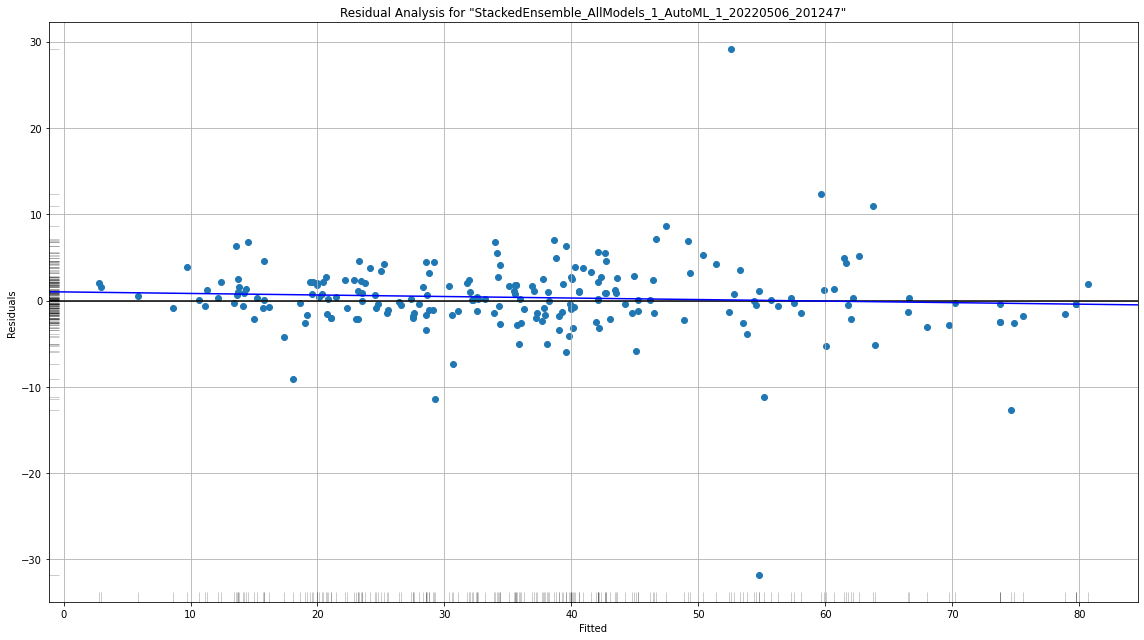

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

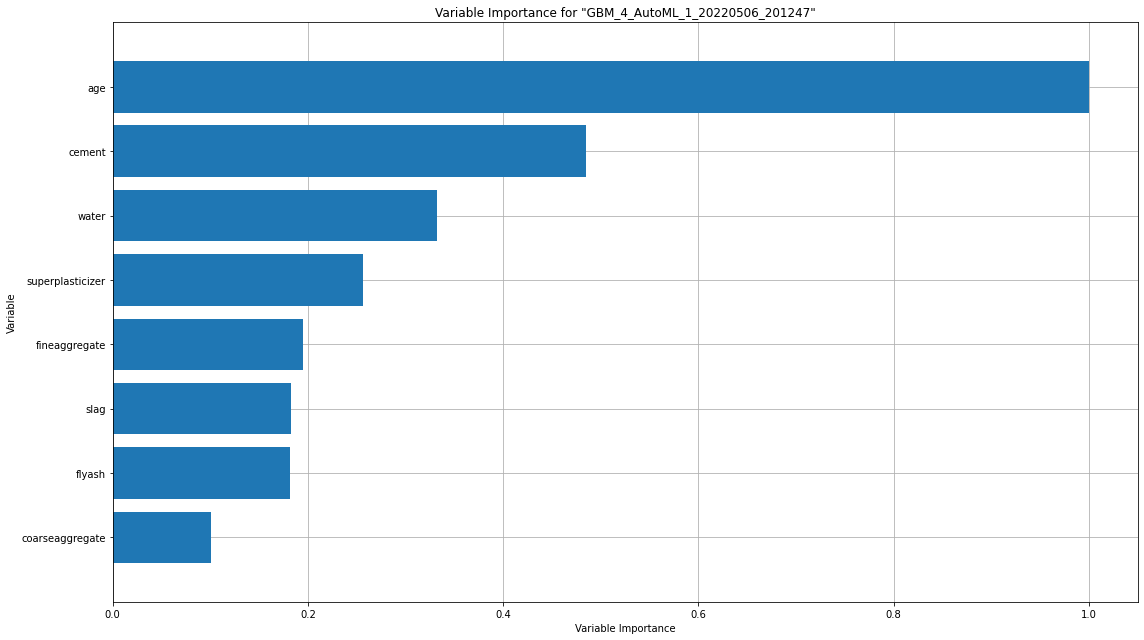

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

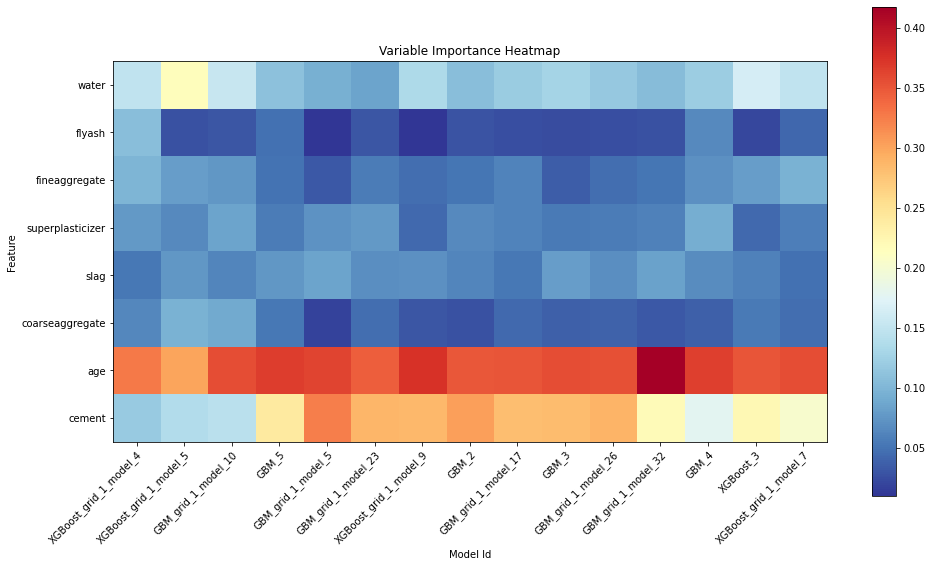

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

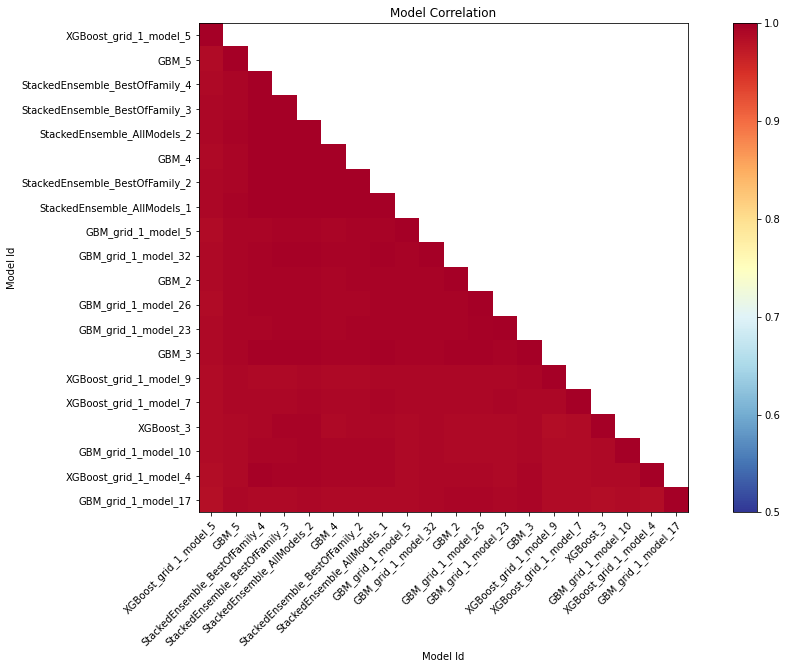

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

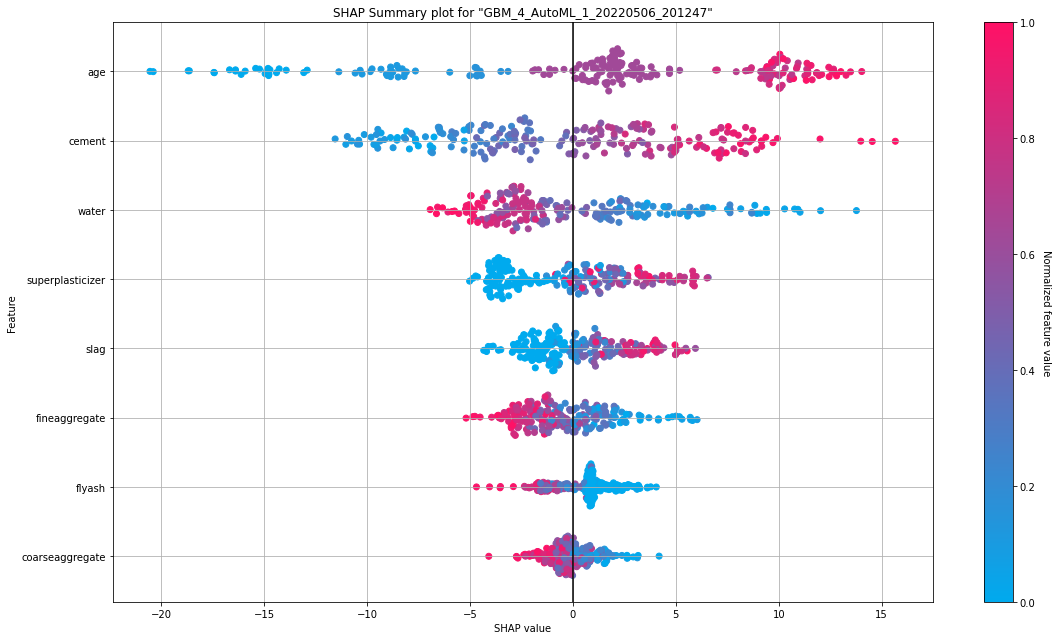

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

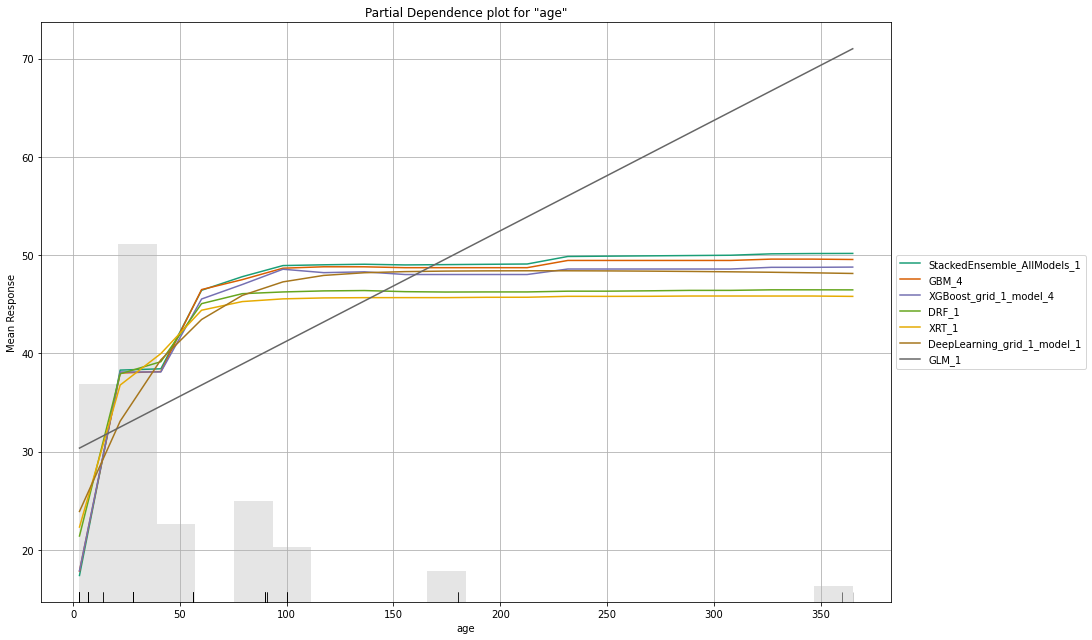

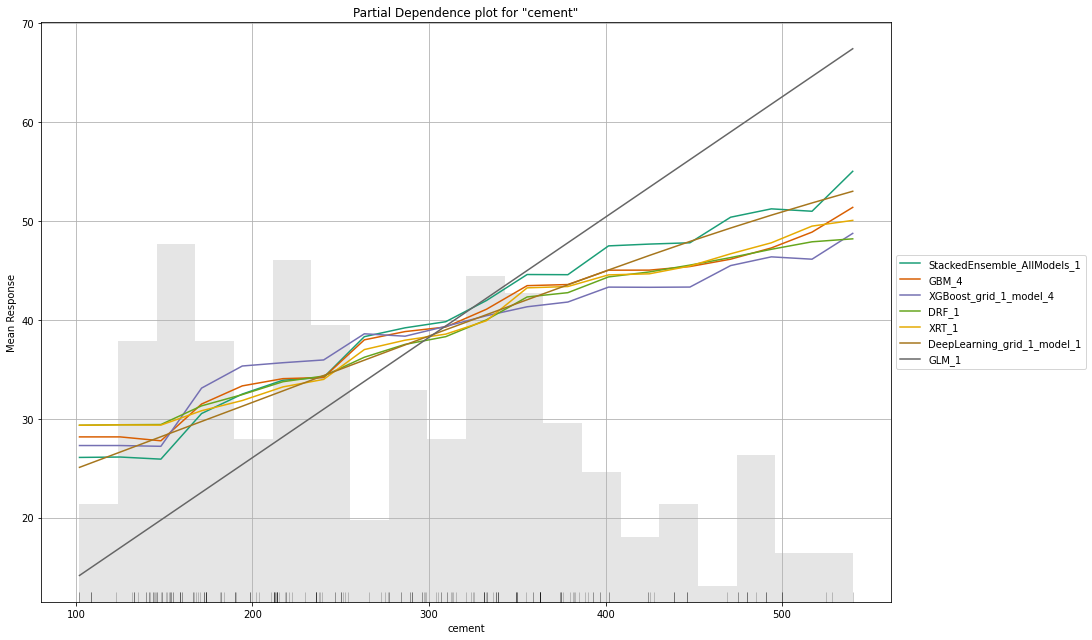

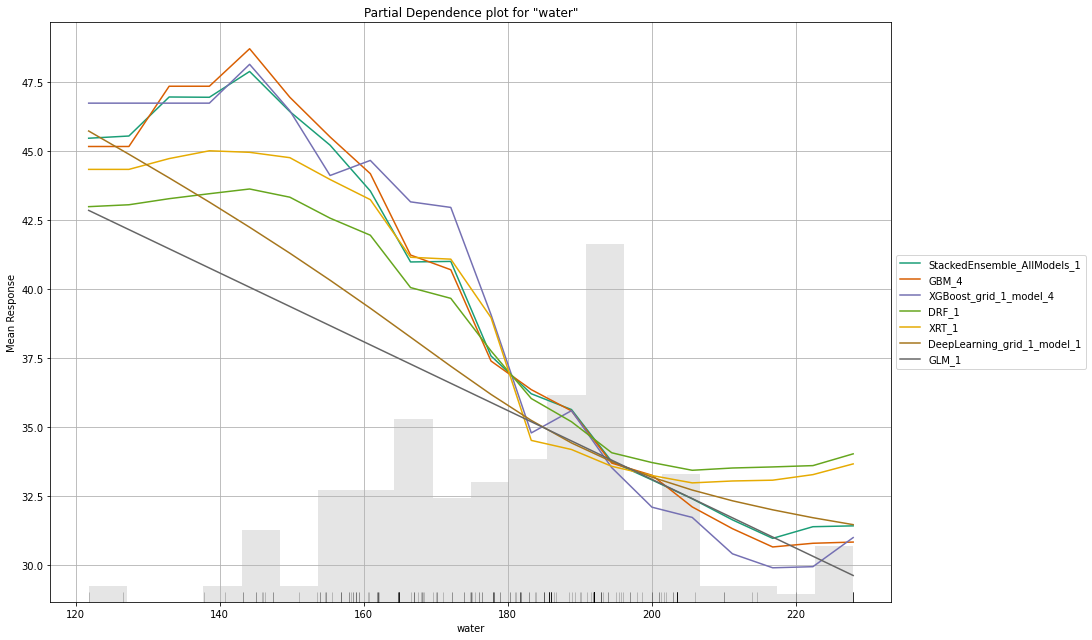

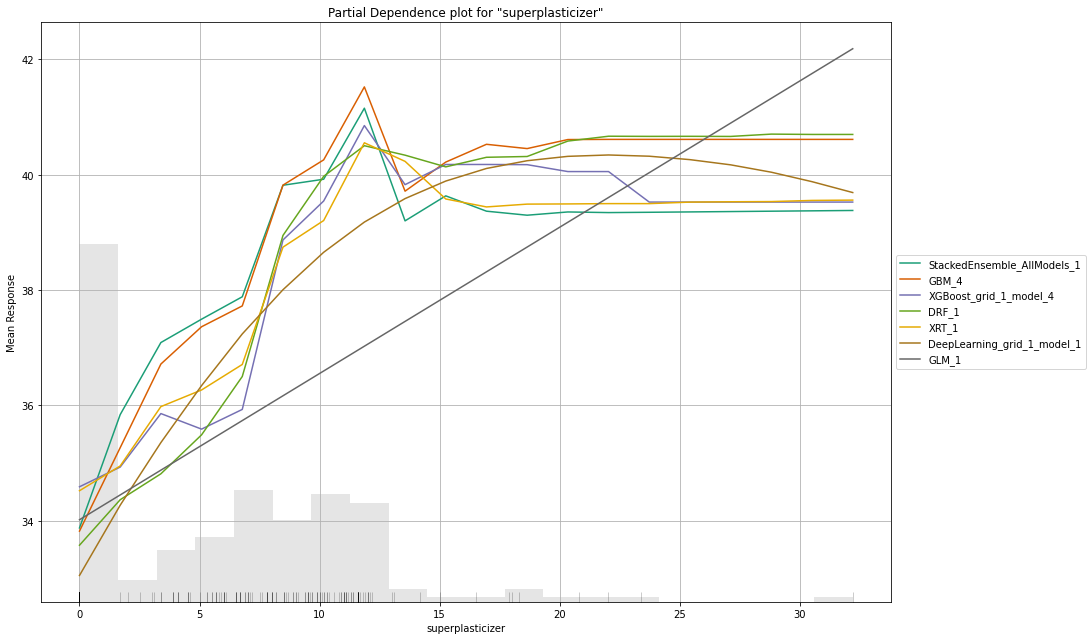

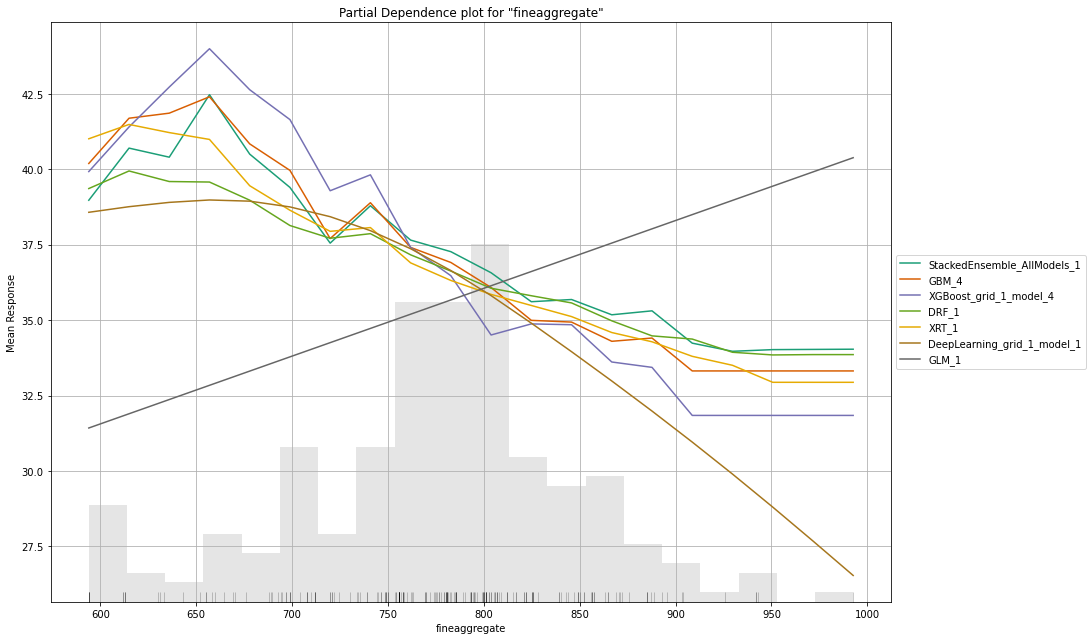

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

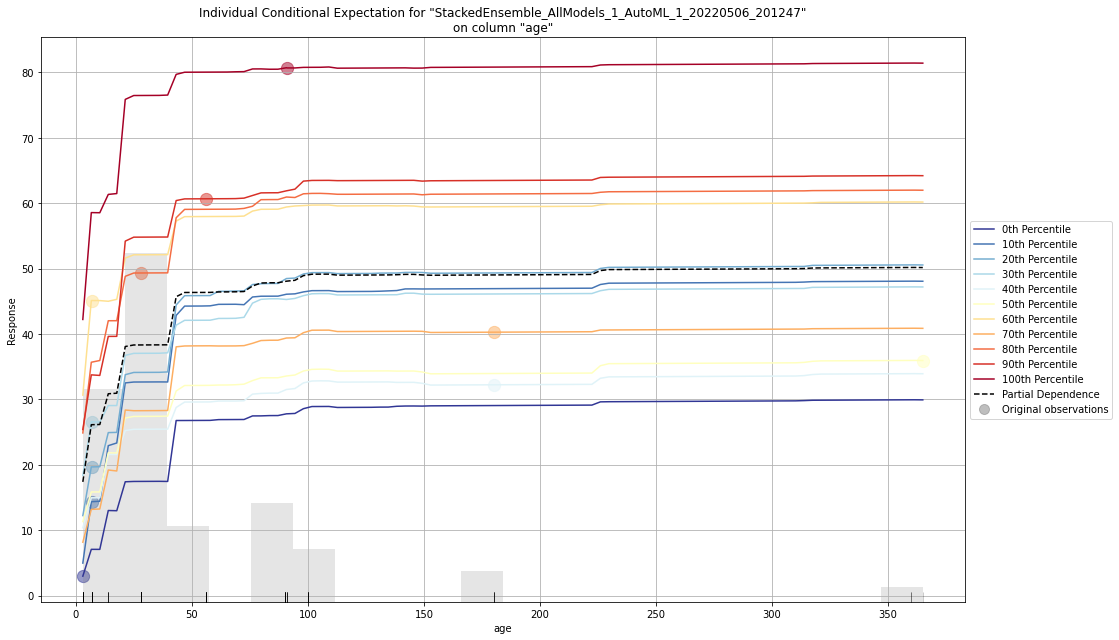

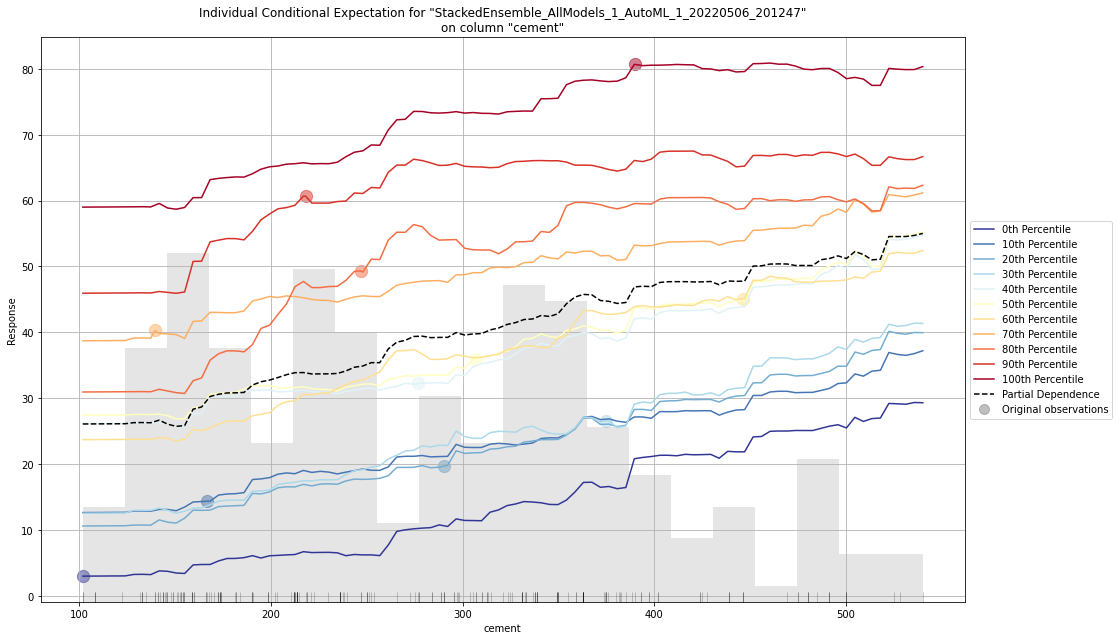

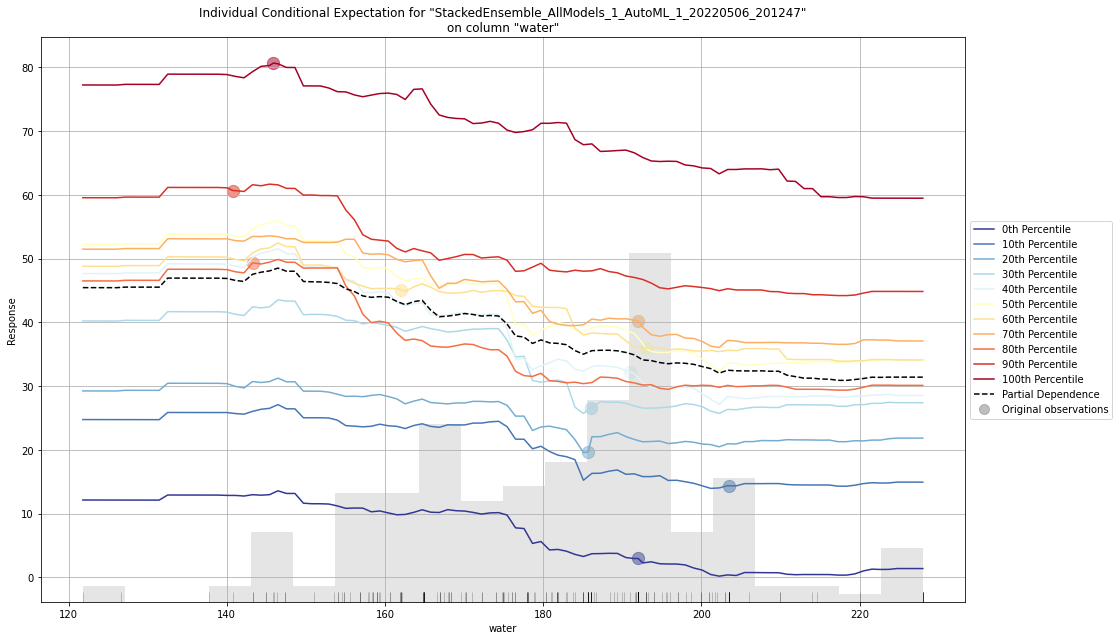

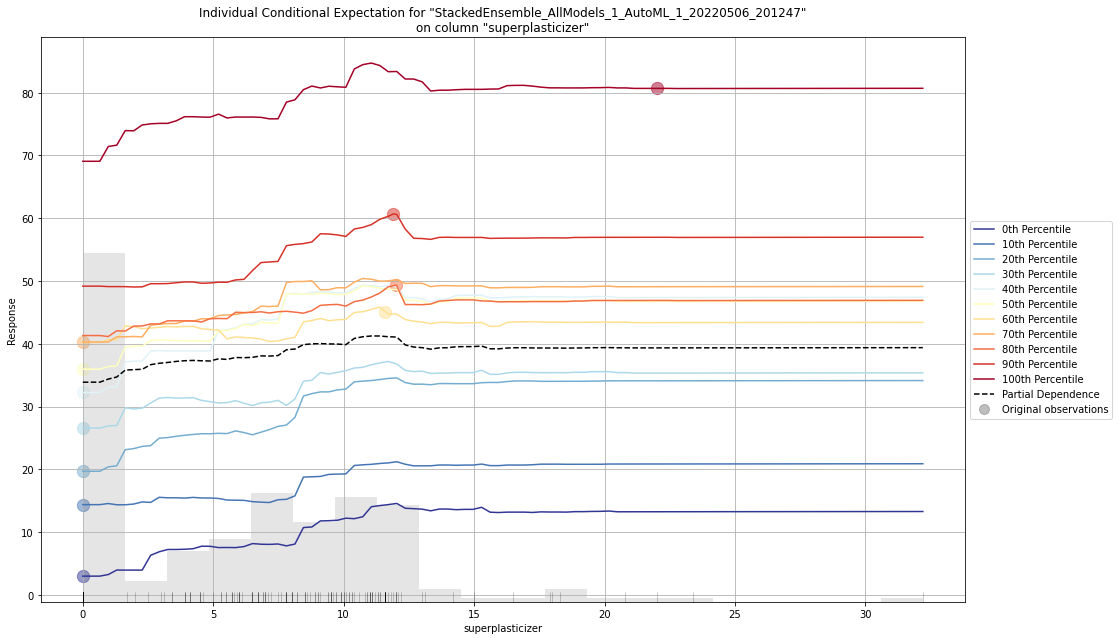

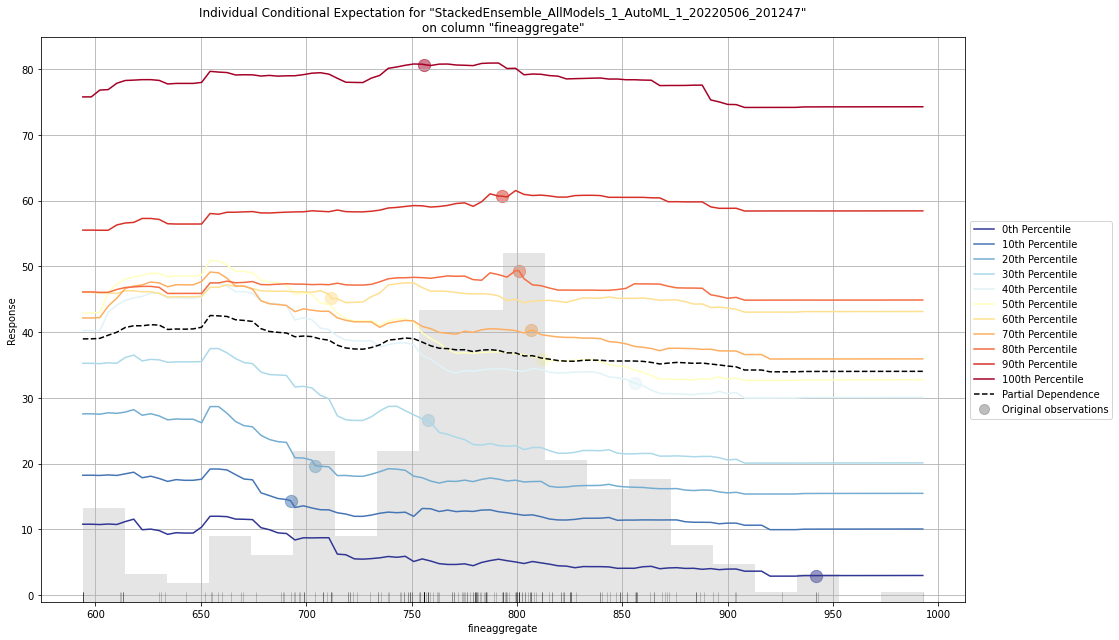

# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id rmse mse mae rmsle mean_residual_deviance training_time_ms predict_time_per_row_ms algo 
 
 
 StackedEnsemble_AllModels_1_AutoML_1_20220506_201247 4.18048 17.4764 2.90738 0.136794 17.4764 370 0.267136 StackedEnsemble 
 StackedEnsemble_AllModels_2_AutoML_1_20220506_201247 4.18136 17.4838 2.9051 0.137169 17.4838 413 0.38033 StackedEnsemble 
 StackedEnsemble_BestOfFamily_2_AutoML_1_20220506_201247 4.18282 17.496 2.91711 0.138244 17.496 337 0.210599 StackedEnsemble 
 StackedEnsemble_BestOfFamily_3_AutoML_1_20220506_201247 4.20674 17.6966 2.94025 0.137966 17.6966 319 0.130866 StackedEnsemble 
 StackedEnsemble_BestOfFamily_4_AutoML_1_20220506_201247 4.21969 17.8058 2.95206 0.137987 17.8058 196 0.156948 StackedEnsemble 
 GBM_4_AutoML_1_20220506_201247 4.30835 18.5619 3.00368 0.140351 18.5619 989 0.092681 GBM 
 GBM_grid_1_AutoML_1_20220506_201247_model_23 4.41934 19.5305 3.07391 0.147111 19.5305 400 0.044684 GBM 
 GBM_grid_1_AutoML_1_20220506_201247_model_26 4.42723 19.6004 3.06795 0.145097 19.6004 367 0.150564 GBM 
 GBM_grid_1_AutoML_1_20220506_201247_model_32 4.4391 19.7056 3.09407 0.145378 19.7056 375 0.103081 GBM 
 XGBoost_grid_1_AutoML_1_20220506_201247_model_4 4.45001 19.8026 3.06977 0.14784 19.8026 293 0.018183 XGBoost 
 GBM_grid_1_AutoML_1_20220506_201247_model_5 4.48611 20.1252 3.14082 0.144192 20.1252 589 0.166867 GBM 
 GBM_3_AutoML_1_20220506_201247 4.49208 20.1788 3.1735 0.14564 20.1788 770 0.127232 GBM 
 GBM_2_AutoML_1_20220506_201247 4.50928 20.3336 3.20248 0.148615 20.3336 789 0.101843 GBM 
 GBM_grid_1_AutoML_1_20220506_201247_model_10 4.50967 20.3371 3.18045 0.159258 20.3371 448 0.076451 GBM 
 XGBoost_grid_1_AutoML_1_20220506_201247_model_7 4.51122 20.3511 3.15002 0.155291 20.3511 347 0.009459 XGBoost 
 GBM_grid_1_AutoML_1_20220506_201247_model_17 4.51371 20.3736 3.24368 0.149591 20.3736 256 0.042902 GBM 
 XGBoost_3_AutoML_1_20220506_201247 4.51666 20.4002 3.18341 0.156775 20.4002 1249 0.005887 XGBoost 
 XGBoost_grid_1_AutoML_1_20220506_201247_model_5 4.54305 20.6393 3.15808 0.165028 20.6393 567 0.015376 XGBoost 
 GBM_5_AutoML_1_20220506_201247 4.54768 20.6814 3.12143 0.148365 20.6814 622 0.088819 GBM 
 XGBoost_grid_1_AutoML_1_20220506_201247_model_9 4.55412 20.74 3.23579 0.158384 20.74 289 0.01481 XGBoost

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

In [ ]:
aml.explain(df_test)

##**Conclusion**

**How well did it work? What did you learn?**

The concrete strength data has been analysed. Data is normalized and split into training and test sets.Important features have been found. Also used SHAP values to study how the data is interpreted. Removed and imputed on 1%, 5%, 10% missing data using three different methods.


We can infer the following, from the above.
*   The data is numerical across all the features and distributed continuouly.

*   There is Collinearity between independent variables.Collinearity observed between the features, flyash, water and coarseaggregate.

*  Coarseaggregate, Cement, Flyash, Superplasticizer, Slag are the most significant features.

* We have fit a linear model and random forest regressor models, and evaluted their performance.

* We have also built an automl model using H2o and found the best model. 

* Studied the effects of Ridge and LASSO regularization on the GLM Model.

* Also, calcuated the error rates i.e, mean absolute errors in each model.

* Noticed the important features from plots, which are cement, age, slag, water and flyash.

* We have run the SHAP analysis on each of the three models and interpreted the models using SHAP plots.

* Calcaulated the SHAP values and compared them with partial dependecy plots.

##**References**

https://scikit-learn.org/stable/modules/impute.html

https://colab.research.google.com/drive/1wEfzH165Ycm_EqVgwSz_r7SvILuj0KRW?usp=sharing#scrollTo=d8fe4103-6e71-4b97-810c-b599a0482944

https://colab.research.google.com/drive/1xFqXOc2eJT78HcVDmoD0twNETiTSvUwB?usp=sharing#scrollTo=dQwTC5qPC-cw

https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook



Copyright (c) 2022 Satya Sri Sowmya Chinimilli

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.